---
# <u>EDA</u>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
# Setting the desired Seaborn theme
sns.set_theme(
    context="paper",
    style='ticks',
    palette='colorblind',
    font='monospace',
    font_scale=1.2,
    rc={
        "figure.figsize": (12, 8),
        "axes.titlesize": "large",
        "axes.labelsize": "medium",
        "xtick.labelsize": "small",
        "ytick.labelsize": "small",
        "legend.fontsize": "medium",
    }
    
    )

In [4]:
# Loading the IHDI-EF data for 2021
ihdi = pd.read_csv('EEA_HDI_EF.csv')
ihdi.head()

,Country,IHDI(2021),EF(2021)
0,Austria,0.851,7.69
1,Belgium,0.874,7.43
2,Bulgaria,0.701,7.46
3,Croatia,0.797,7.25
4,Czech Republic,0.850,7.81


In [5]:
# Basic descriptive statistics
ihdi.describe()

,IHDI(2021),EF(2021)
count,30.000000,30.000000
mean,0.834633,7.646667
std,0.053225,0.326711
min,0.701000,6.940000
25%,0.793250,7.437500
50%,0.839000,7.695000
75%,0.881750,7.810000
max,0.915000,8.470000


In [6]:
# Correlation coefficients
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calculate p-values for the correlation coefficients
pearson = pearsonr(ihdi['IHDI(2021)'], ihdi['EF(2021)'])
spearman = spearmanr(ihdi['IHDI(2021)'], ihdi['EF(2021)'])
kendall = kendalltau(ihdi['IHDI(2021)'], ihdi['EF(2021)'])

In [7]:
# Defining the Xi correlation coefficient (https://gist.github.com/itamarfaran/0cffce51cd0e3d78ddf509b72a9e702d)
from scipy.stats import rankdata, norm


def xicor(x, y, ties="auto"):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(y)

    if len(x) != n:
        raise IndexError(
            f"x, y length mismatch: {len(x)}, {len(y)}"
        )

    if ties == "auto":
        ties = len(np.unique(y)) < n
    elif not isinstance(ties, bool):
        raise ValueError(
            f"expected ties either \"auto\" or boolean, "
            f"got {ties} ({type(ties)}) instead"
        )
    
    y = y[np.argsort(x)]
    r = rankdata(y, method="ordinal")
    nominator = np.sum(np.abs(np.diff(r)))

    if ties:
        l = rankdata(y, method="max")
        denominator = 2 * np.sum(l * (n - l))
        nominator *= n
    else:
        denominator = np.power(n, 2) - 1
        nominator *= 3

    statistic = 1 - nominator / denominator  # upper bound is (n - 2) / (n + 1)
    p_value = norm.sf(statistic, scale=2 / 5 / np.sqrt(n))

    return statistic, p_value

In [8]:
xicor(x=ihdi['EF(2021)'], y=ihdi['IHDI(2021)'], ties='auto')

(0.19530037685657287, 0.0037447119740746672)

In [9]:
# All correlation coefficients
xi = xicor(x=ihdi['IHDI(2021)'], y=ihdi['EF(2021)'], ties='auto')
print('Xi:')
print(xi)
print('Pearson:')
print(pearson)
print('Kendall:')
print(kendall)
print('Spearman:')
print(spearman)

Xi:
(0.12896691424713036, 0.03870193405351571)
Pearson:
PearsonRResult(statistic=0.4852238723646323, pvalue=0.006570418348997813)
Kendall:
SignificanceResult(statistic=0.3883731432495088, pvalue=0.0028404521474661277)
Spearman:
SignificanceResult(statistic=0.5618666089308783, pvalue=0.0012332630213071666)


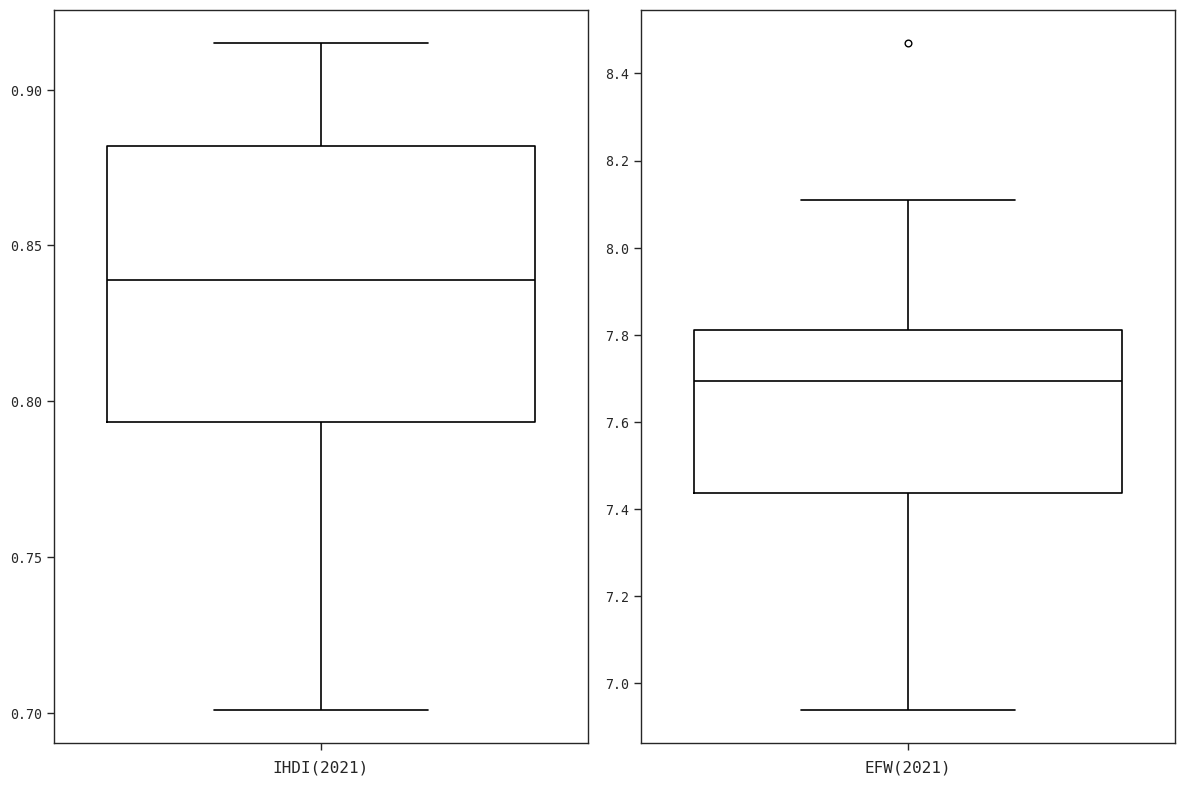

In [10]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Box plot for IHDI
sns.boxplot(y=ihdi['IHDI(2021)'], ax=axes[0], color='black' , fill=False)
axes[0].set_xlabel('IHDI(2021)')
axes[0].set_ylabel('')

# Box plot for EF
sns.boxplot(y=ihdi['EF(2021)'], ax=axes[1], color='black' , fill=False)
axes[1].set_xlabel('EFW(2021)')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

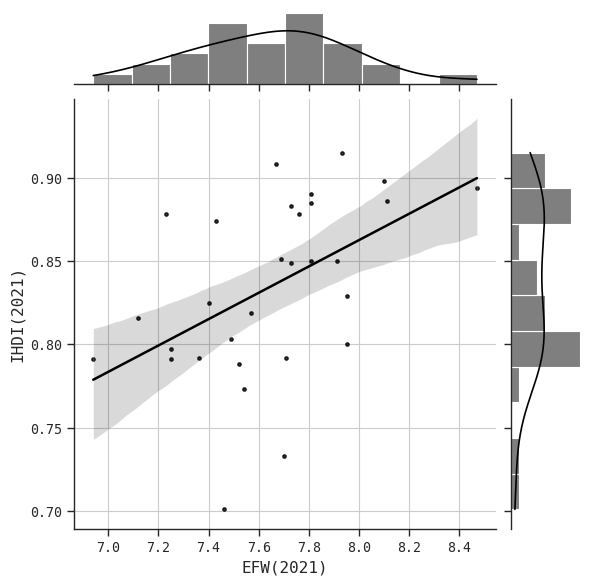

In [11]:
# Joint plot to demonstrate the relationship
sns.jointplot(ihdi, x='EF(2021)', y='IHDI(2021)', kind='reg', marker='.', marginal_kws=dict(bins=10, fill=True) , color='black')
plt.xlabel('EFW(2021)')
plt.grid()

In [12]:
data = pd.read_csv('Completed.csv')
data = data.set_index(['country' , 'year'])
data.head()

Unnamed: 0  Index         rgdpe         rgdpo       emp  \
country year                                                            
Austria 2000           0      0  314579.68750  306927.56250  3.759931   
        2001           1      1  308449.03125  299963.12500  3.785839   
        2002           2      2  313331.15625  306288.46875  3.780694   
        2003           3      3  318809.15625  313908.28125  3.806159   
        2004           4      4  330761.75000  326475.03125  3.825346   

                      avh        hc   labor_stock         rnna     delta  ...  \
country year                                                              ...   
Austria 2000  1798.432211  3.117029  21077.292719  1870413.500  0.038341  ...   
        2001  1785.420148  3.133231  21178.488353  1918997.000  0.038775  ...   
        2002  1782.847940  3.149517  21229.009791  1960784.375  0.039133  ...   
        2003  1773.977855  3.165887  21376.199508  2005640.750  0.039426  ...   
        2004  1776.465838  3.182343  21625.917573  2049323.250  0.039652  ...   

              Market openness  Year  Countries  \
country year                                     
Austria 2000        74.333333  2000    Austria   
        2001        72.666667  2001    Austria   
        2002        73.200000  2002    Austria   
        2003        73.800000  2003    Austria   
        2004        73.266667  2004    Austria   

              Economic Freedom Summary Index  1  Size of Government  \
country year                                                          
Austria 2000                            8.02                   5.37   
        2001                            7.94                   5.42   
        2002                            7.92                   5.38   
        2003                            8.08                   5.67   
        2004                            8.03                   5.68   

              2  Legal System & Property Rights -- With Gender Adjustment  \
country year                                                                
Austria 2000                                               8.12             
        2001                                               8.12             
        2002                                               8.00             
        2003                                               8.37             
        2004                                               8.28             

              2 Legal System & Property Rights - No Gender Adjustment  \
country year                                                            
Austria 2000                                               8.63         
        2001                                               8.63         
        2002                                               8.50         
        2003                                               8.63         
        2004                                               8.53         

              3  Sound Money  4  Freedom to trade internationally  \
country year                                                        
Austria 2000            9.63                                 9.36   
        2001            9.58                                 9.25   
        2002            9.63                                 9.20   
        2003            9.65                                 9.26   
        2004            9.62                                 9.19   

              5  Regulation  
country year                 
Austria 2000           7.62  
        2001           7.34  
        2002           7.41  
        2003           7.46  
        2004           7.38  

[5 rows x 39 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 600 entries, ('Austria', 2000) to ('Switzerland', 2019)
Data columns (total 39 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Unnamed: 0                                                   600 non-null    int64  
 1   Index                                                        600 non-null    int64  
 2   rgdpe                                                        600 non-null    float64
 3   rgdpo                                                        600 non-null    float64
 4   emp                                                          600 non-null    float64
 5   avh                                                          600 non-null    float64
 6   hc                                                           600 non-null    float64
 7   labor_stock                                   

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_27098/1537371626.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Index Year', y='rgdpo', ax=axs[0], label='Real Output-side GDP', ci=None, linewidth=line_width , linestyle='-' , color='black')
/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_27098/1537371626.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Index Year', y='rgdpe', ax=axs[0], label='Real Expenditure-side GDP', ci=None, linewidth=line_width , linestyle='--' , color='black')
/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_27098/1537371626.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Index Year', y='capital_stock', ax=axs[1], ci=None, linewidth=line_width , color='black')
/var/folders/9f/pv1nlhw528d_5zttz

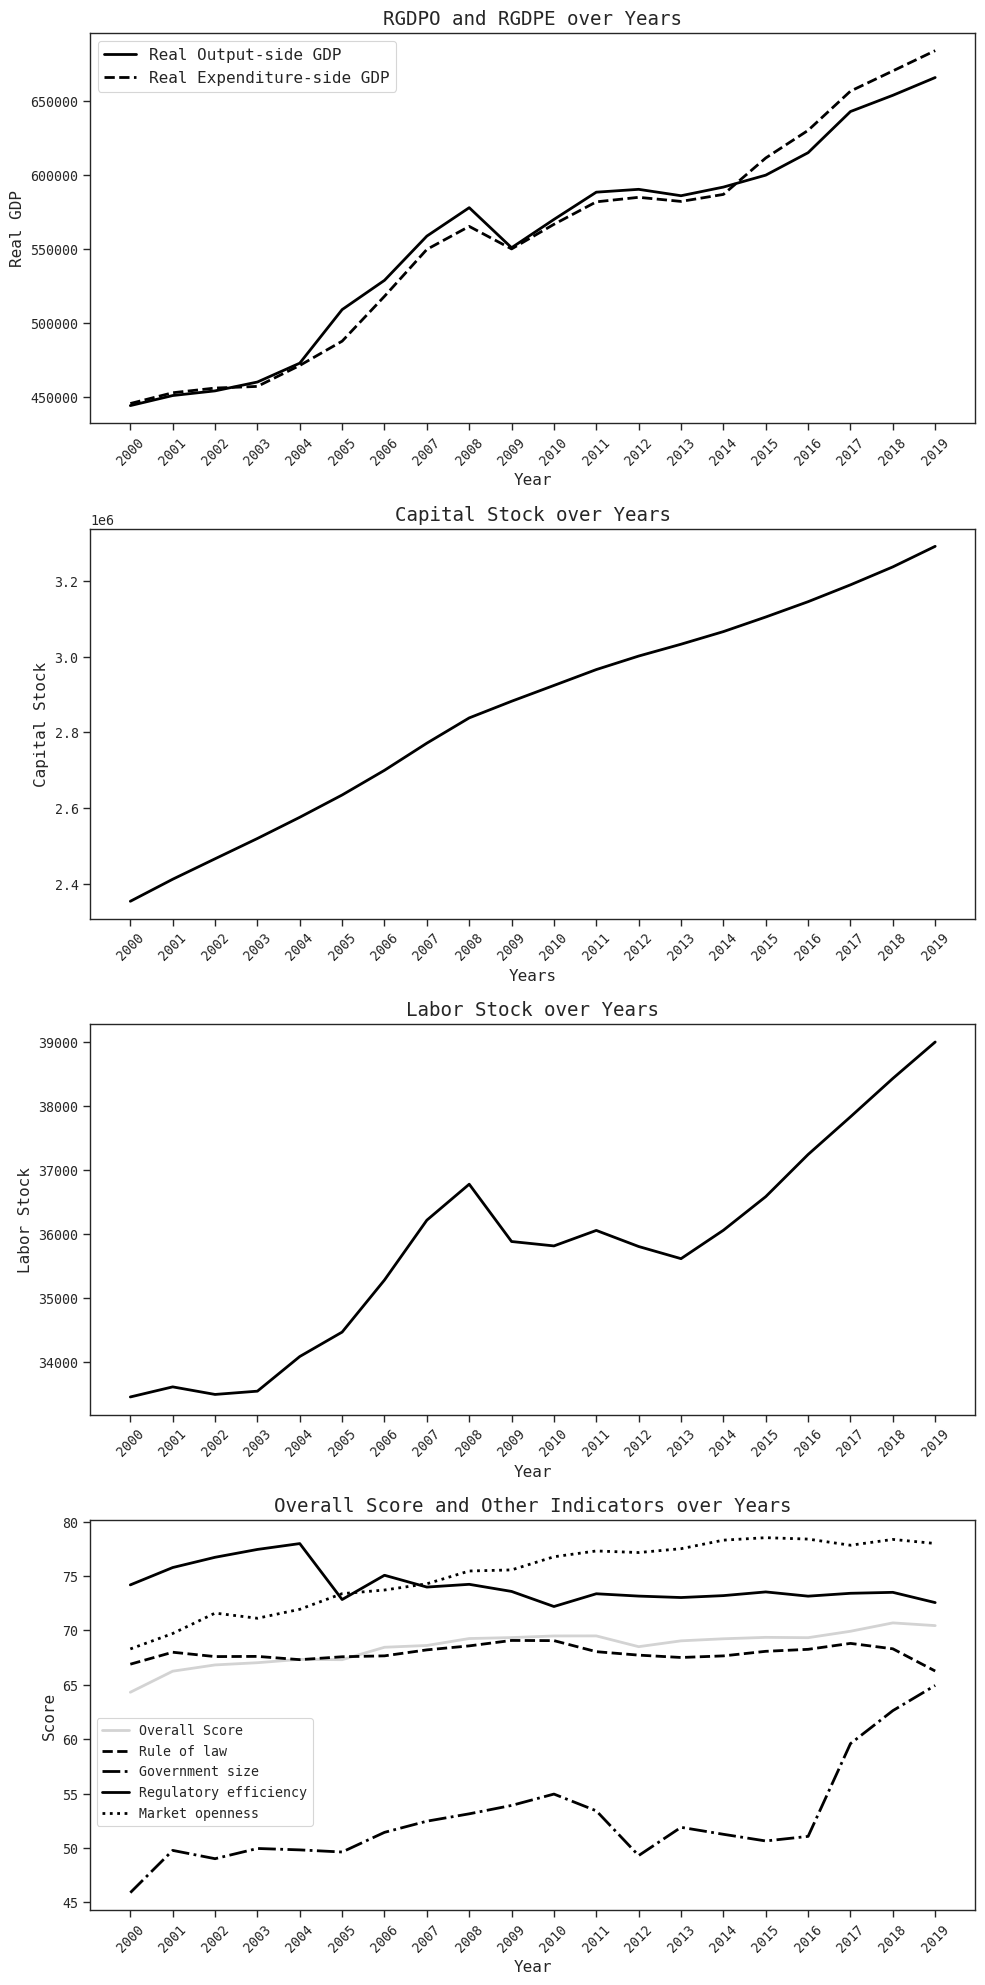

In [14]:
import matplotlib.ticker as ticker

# Create a figure and a grid of subplots (4 rows, 1 column)
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Define line width
line_width = 2

# Plot 1: rgdpo and rgdpe
sns.lineplot(data=data, x='Index Year', y='rgdpo', ax=axs[0], label='Real Output-side GDP', ci=None, linewidth=line_width , linestyle='-' , color='black')
sns.lineplot(data=data, x='Index Year', y='rgdpe', ax=axs[0], label='Real Expenditure-side GDP', ci=None, linewidth=line_width , linestyle='--' , color='black')
axs[0].set_title('RGDPO and RGDPE over Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Real GDP')
axs[0].legend()

# Plot 2: capital_stock
sns.lineplot(data=data, x='Index Year', y='capital_stock', ax=axs[1], ci=None, linewidth=line_width , color='black')
axs[1].set_title('Capital Stock over Years')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Capital Stock')

# Plot 3: labor_stock
sns.lineplot(data=data, x='Index Year', y='labor_stock', ax=axs[2], ci=None, linewidth=line_width , color='black')
axs[2].set_title('Labor Stock over Years')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Labor Stock')

# Plot 4: Overall Score and other variables
sns.lineplot(data=data, x='Index Year', y='Overall Score', ax=axs[3], label='Overall Score', ci=None, linewidth=line_width , linestyle='-' , color='lightgray')
sns.lineplot(data=data, x='Index Year', y='Rule of law', ax=axs[3], label='Rule of law', ci=None, linewidth=line_width , linestyle='--' , color='black')
sns.lineplot(data=data, x='Index Year', y='Government size', ax=axs[3], label='Government size', ci=None, linewidth=line_width , linestyle='-.' , color='black')
sns.lineplot(data=data, x='Index Year', y='Regulatory efficiency', ax=axs[3], label='Regulatory efficiency', ci=None, linewidth=line_width , linestyle='-' , color='black')
sns.lineplot(data=data, x='Index Year', y='Market openness', ax=axs[3], label='Market openness', ci=None, linewidth=line_width , linestyle=':' , color='black')
axs[3].set_title('Overall Score and Other Indicators over Years')

# Adjust the layout and position of the legend
axs[3].legend(loc='lower left', fontsize='small', bbox_to_anchor=(0, 0.2))

# Set x-axis to show all years as integers
for ax in axs:
    ax.set_xticks(range(2000, 2020))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Score')

# Show the plot
plt.show()

---

## Loading the panel data

In [15]:
# Opening the mail file for the panel regression models
df = pd.read_csv('DF_FINAL.csv')
df.head()

,Index,country,year,Lnrgdpo,Lnlabor_stock,Lncapital_stock,RL,GS,RE,MO,LnRL,LnGS,LnRE,LnMO
0,0,Austria,2000,12.634367,9.955952,14.402575,82.5,34.60,79.20,74.333333,4.412798,3.543854,4.371976,4.308559
1,1,Austria,2001,12.611415,9.960741,14.427767,83.0,34.60,79.80,72.666667,4.418841,3.543854,4.379524,4.285883
2,2,Austria,2002,12.632283,9.963124,14.448936,83.5,31.70,78.20,73.200000,4.424847,3.456317,4.359270,4.293195
3,3,Austria,2003,12.656856,9.970033,14.471249,84.0,31.95,77.55,73.800000,4.430817,3.464172,4.350923,4.301359
4,4,Austria,2004,12.696109,9.981648,14.492561,84.0,32.25,77.95,73.266667,4.430817,3.473518,4.356068,4.294106


In [16]:
variables = ['Lnrgdpo' , 'Lnlabor_stock' , 'Lncapital_stock' , 'RL' , 'GS' , 'RE' , 'MO']

---

## Performing first differencing

In [17]:
df['d_Lnrgdpo'] = df.groupby('country')['Lnrgdpo'].diff()
df['d_Lnlabor_stock'] = df.groupby('country')['Lnlabor_stock'].diff()
df['d_Lncapital_stock'] = df.groupby('country')['Lncapital_stock'].diff()
df['d_RL'] = df.groupby('country')['RL'].diff()
df['d_GS'] = df.groupby('country')['GS'].diff()
df['d_RE'] = df.groupby('country')['RE'].diff()
df['d_MO'] = df.groupby('country')['MO'].diff()

# Remove rows with NA values created by differencing
df_diff = df.dropna()

In [18]:
df_diff.head()
df_diff.shape

(570, 21)

In [19]:
df_diff.to_csv('DF_FINAL_diff.csv' , index=False)

---
# <u>Model Estimations</u>

General econometrics model:
$$  {ln(GDP)}_{i,t} \propto {ln(L)}_{i,t} + {ln(K)}_{i,t} + {RL}_{i,t} + {GS}_{i,t} + {RE}_{i,t} + {MO}_{i,t} $$

Applying first differencing:
$$   \Delta {ln(GDP)}_{i,t} \propto \Delta {ln(L)}_{i,t} + \Delta {ln(K)}_{i,t} + \Delta {RL}_{i,t} + \Delta {GS}_{i,t} + \Delta {RE}_{i,t} + \Delta {MO}_{i,t} $$

---
**For a general model**:
$$
y_{i,t} \propto X_{i,t}
$$
where $y$ is the dependent variable and $X$ is a vector of independent variables

---
Pooled OLS estimation
$$
y_{i,t} = \mu + \beta X_{i,t} + \epsilon_{i,t}
$$

---
Random-effects estimation with both entity and time random effects
$$
y_{i,t} = \mu + \beta X_{i,t} + \alpha_i + \eta_t + \epsilon_{i,t}
$$

where $\alpha_i$ and $\eta_t$ are the entity-specific and time-specific random effects respectively.
$$
\implies \quad Cov(\alpha_i , X_{i,t})=0 \quad \text{and} \quad Cov(\gamma_t , X_{i,t})=0
$$

---
Fixed-effects estimation with both entity and time effects
$$
y_{i,t} = \mu_{i} + \lambda_{t} + \beta X_{i,t} + \epsilon_{i,t}
$$

---
For CCEP and CCEMG:
$$
\gamma f_{t} = \gamma_{1} \bar{y_{t}} + \gamma_{2} \bar{X_{t}}
$$

Pooled common correlated effects estimator (CCEP)
$$
y_{i,t} = \mu + \beta X_{i,t} + \gamma f_{t} + \epsilon_{i,t} = \mu + \beta X_{i,t} + \gamma_{1} \bar{y_{t}} + \gamma_{2} \bar{X_{t}} + \epsilon_{i,t}
$$

Mean groups common correlated effects estimator (CCEMG)
$$
y_{i,t} = \mu_{i} + \beta_{i} X_{i,t} + \gamma f_{t} + \epsilon_{i,t} = \mu_{i} + \beta_{i} X_{i,t} + \gamma_{1} \bar{y_{t}} + \gamma_{2} \bar{X_{t}} + \epsilon_{i,t}
$$

---
## Fixed-effects estimation with both entity and time effects
$$   \Delta {ln(GDP)}_{i,t} = \mu_{i} + \lambda_{t} + \beta_{1} \Delta {ln(L)}_{i,t} + \beta_{2} \Delta {ln(K)}_{i,t} + \beta_{3} \Delta {RL}_{i,t} + \beta_{4} \Delta {GS}_{i,t} + \beta_{5} \Delta {RE}_{i,t} + \beta_{6} \Delta {MO}_{i,t} + \epsilon_{i,t}$$

---
## Pooled common correlated effects estimator (CCEP)
$$
\Delta ln(GDP)_{i,t} = \mu + \lambda_{t} + \beta_{1} \Delta ln(L)_{i,t} + \beta_{2} \Delta ln(K)_{i,t} + \beta_{3} \Delta RL_{i,t} + \beta_{4} \Delta GS_{i,t} + \beta_{5} \Delta RE_{i,t} + \beta_{6} \Delta MO_{i,t} + \gamma f_{t} + \epsilon_{i,t}
$$
where
$$
\gamma f_{t} = \gamma_{1} \overline{\Delta ln(GDP)_{t}} + \gamma_{2} \overline{\Delta ln(L)_{t}} + \gamma_{3} \overline{\Delta ln(K)_{t}} + \gamma_{4} \overline{\Delta RL_{t}} + \gamma_{5} \overline{\Delta GS_{t}} + \gamma_{6} \overline{\Delta RE_{t}} + \gamma_{7} \overline{\Delta MO_{t}}

---
## Mean groups common correlated effects estimator (CCEMG)
For each cross-section $i$ :
$$
\Delta ln(GDP)_{i,t} = \mu_{i} + \lambda_{t} + \beta_{1,i} \Delta ln(L)_{i,t} + \beta_{2,i} \Delta ln(K)_{i,t} + \beta_{3,i} \Delta RL_{i,t} + \beta_{4,i} \Delta GS_{i,t} + \beta_{5,i} \Delta RE_{i,t} + \beta_{6,i} \Delta MO_{i,t} + \gamma_{i} f_{t} + \epsilon_{i,t}
$$
where
$$
 \gamma_i f_t = \gamma_{1,i} \overline{\Delta ln({GDP})_t} + \gamma_{2,i} \overline{\Delta ln({L})_t} + \gamma_{3,i} \overline{\Delta ln({K})_t} + \gamma_{4,i} \overline{\Delta {RL}_t} + \gamma_{5,i} \overline{\Delta {GS}_t} + \gamma_{6,i} \overline{\Delta {RE}_t} + \gamma_{7,i} \overline{\Delta {MO}_t} 
 $$

then, average the coefficients across all cross-sections:
$$
\beta_{j} = \frac{1}{N} \sum_{i=1}^{N} \beta{j,i} \quad \text{for } j=1 , 2 , \ldots , 6
$$

---
# <u>Model Diagnostics and Testing</u>

In [20]:
# Bringing the fitted values and residuals from R to Python
R_models = pd.read_csv('R-models.csv')
R_models.head()

,Model,FittedValues,Residuals
0,Pooled,12.831703,-0.220288
1,Pooled,12.847128,-0.214846
2,Pooled,12.868755,-0.211899
3,Pooled,12.884892,-0.188784
4,Pooled,12.912103,-0.125567


## Correlation Matrices

### Pearson

In [21]:
# Opening the main file for the panel regression models
df = pd.read_csv('DF_FINAL.csv')
df.drop('Index', axis=1 , inplace=True)
df.drop('country', axis=1 , inplace=True)
df.drop('year', axis=1 , inplace=True)
# Correlation matrix
correlation_matrix_pearson = df.corr(method='pearson')
correlation_matrix_pearson

,Lnrgdpo,Lnlabor_stock,Lncapital_stock,RL,GS,RE,MO,LnRL,LnGS,LnRE,LnMO
Lnrgdpo,1.000000,0.956389,0.976470,0.113939,-0.365095,0.006256,0.090852,0.116831,-0.346671,0.017642,0.095216
Lnlabor_stock,0.956389,1.000000,0.926098,-0.121872,-0.253234,-0.119088,-0.025742,-0.119194,-0.242380,-0.107618,-0.021714
Lncapital_stock,0.976470,0.926098,1.000000,0.121792,-0.413025,0.034385,0.089682,0.134244,-0.386893,0.050450,0.096522
RL,0.113939,-0.121872,0.121792,1.000000,-0.425313,0.545178,0.522296,0.989197,-0.426499,0.526195,0.516362
GS,-0.365095,-0.253234,-0.413025,-0.425313,1.000000,-0.218661,-0.003266,-0.414899,0.976748,-0.202351,-0.003565
RE,0.006256,-0.119088,0.034385,0.545178,-0.218661,1.000000,0.379515,0.545065,-0.274585,0.986615,0.380631
MO,0.090852,-0.025742,0.089682,0.522296,-0.003266,0.379515,1.000000,0.536199,-0.043493,0.378597,0.996952
LnRL,0.116831,-0.119194,0.134244,0.989197,-0.414899,0.545065,0.536199,1.000000,-0.410363,0.531982,0.534205
LnGS,-0.346671,-0.242380,-0.386893,-0.426499,0.976748,-0.274585,-0.043493,-0.410363,1.000000,-0.252477,-0.042341
LnRE,0.017642,-0.107618,0.050450,0.526195,-0.202351,0.986615,0.378597,0.531982,-0.252477,1.000000,0.383161


### Spearman

In [22]:
correlation_matrix_spearman = df.corr(method='spearman')
correlation_matrix_spearman

,Lnrgdpo,Lnlabor_stock,Lncapital_stock,RL,GS,RE,MO,LnRL,LnGS,LnRE,LnMO
Lnrgdpo,1.000000,0.922490,0.957170,0.150225,-0.389184,0.023650,0.115403,0.150218,-0.389184,0.023654,0.115403
Lnlabor_stock,0.922490,1.000000,0.896567,-0.097854,-0.271534,-0.110470,-0.012648,-0.097863,-0.271534,-0.110455,-0.012648
Lncapital_stock,0.957170,0.896567,1.000000,0.145957,-0.461431,0.033426,0.115690,0.145949,-0.461431,0.033443,0.115690
RL,0.150225,-0.097854,0.145957,1.000000,-0.426157,0.529365,0.490307,1.000000,-0.426157,0.529346,0.490307
GS,-0.389184,-0.271534,-0.461431,-0.426157,1.000000,-0.157345,0.026028,-0.426164,1.000000,-0.157343,0.026028
RE,0.023650,-0.110470,0.033426,0.529365,-0.157345,1.000000,0.318345,0.529375,-0.157345,1.000000,0.318345
MO,0.115403,-0.012648,0.115690,0.490307,0.026028,0.318345,1.000000,0.490311,0.026028,0.318342,1.000000
LnRL,0.150218,-0.097863,0.145949,1.000000,-0.426164,0.529375,0.490311,1.000000,-0.426164,0.529356,0.490311
LnGS,-0.389184,-0.271534,-0.461431,-0.426157,1.000000,-0.157345,0.026028,-0.426164,1.000000,-0.157343,0.026028
LnRE,0.023654,-0.110455,0.033443,0.529346,-0.157343,1.000000,0.318342,0.529356,-0.157343,1.000000,0.318342


### Kendall

In [23]:
correlation_matrix_kendall = df.corr(method='kendall')
correlation_matrix_kendall

,Lnrgdpo,Lnlabor_stock,Lncapital_stock,RL,GS,RE,MO,LnRL,LnGS,LnRE,LnMO
Lnrgdpo,1.000000,0.788414,0.843829,0.083838,-0.246080,0.012912,0.081785,0.083833,-0.246080,0.012912,0.081785
Lnlabor_stock,0.788414,1.000000,0.739421,-0.067784,-0.164208,-0.075917,-0.003827,-0.067790,-0.164208,-0.075907,-0.003827
Lncapital_stock,0.843829,0.739421,1.000000,0.083358,-0.288921,0.017188,0.081528,0.083353,-0.288921,0.017199,0.081528
RL,0.083838,-0.067784,0.083358,1.000000,-0.293008,0.369746,0.344999,0.999997,-0.293008,0.369741,0.344999
GS,-0.246080,-0.164208,-0.288921,-0.293008,1.000000,-0.110009,0.017928,-0.293014,1.000000,-0.109989,0.017928
RE,0.012912,-0.075917,0.017188,0.369746,-0.110009,1.000000,0.223574,0.369752,-0.110009,0.999983,0.223574
MO,0.081785,-0.003827,0.081528,0.344999,0.017928,0.223574,1.000000,0.345005,0.017928,0.223578,1.000000
LnRL,0.083833,-0.067790,0.083353,0.999997,-0.293014,0.369752,0.345005,1.000000,-0.293014,0.369747,0.345005
LnGS,-0.246080,-0.164208,-0.288921,-0.293008,1.000000,-0.110009,0.017928,-0.293014,1.000000,-0.109989,0.017928
LnRE,0.012912,-0.075907,0.017199,0.369741,-0.109989,0.999983,0.223578,0.369747,-0.109989,1.000000,0.223578


### Xi

In [24]:
correlation_matrix_xi = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate the correlation between each pair of columns
for col1 in df.columns:
    for col2 in df.columns:
        statistic, _ = xicor(df[col1], df[col2])
        correlation_matrix_xi.loc[col1, col2] = statistic

# Convert the correlation matrix to float type
correlation_matrix_xi = correlation_matrix_xi.astype(float)

In [25]:
correlation_matrix_xi

,Lnrgdpo,Lnlabor_stock,Lncapital_stock,RL,GS,RE,MO,LnRL,LnGS,LnRE,LnMO
Lnrgdpo,0.995008,0.740541,0.810449,0.325896,0.345552,0.240963,0.220765,0.325893,0.345552,0.240935,0.220765
Lnlabor_stock,0.769108,0.995008,0.785766,0.387629,0.456577,0.180516,0.296589,0.387626,0.456577,0.180522,0.296589
Lncapital_stock,0.792024,0.657207,0.995008,0.223502,0.277878,0.147174,0.196824,0.223499,0.277878,0.147149,0.196824
RL,0.157006,0.144973,0.179256,0.994987,0.223570,0.253149,0.267497,0.994987,0.223570,0.253171,0.267497
GS,0.135364,0.112048,0.178431,0.151494,0.995008,0.144474,0.067815,0.151489,0.995008,0.144515,0.067815
RE,0.132431,0.137031,0.101814,0.218657,0.121695,0.995007,0.128287,0.218670,0.121695,0.995007,0.128287
MO,0.076572,0.065297,0.081697,0.276373,0.119978,0.192935,0.995000,0.276403,0.119978,0.192958,0.995000
LnRL,0.157006,0.144973,0.179256,0.994971,0.223570,0.247465,0.269701,0.994987,0.223570,0.247486,0.269701
LnGS,0.135364,0.112048,0.178431,0.151494,0.995008,0.144474,0.067815,0.151489,0.995008,0.144515,0.067815
LnRE,0.129031,0.132464,0.098497,0.216448,0.119295,0.994957,0.126968,0.216461,0.119295,0.995007,0.126968


<Axes: xlabel='Lnlabor_stock', ylabel='Lncapital_stock'>

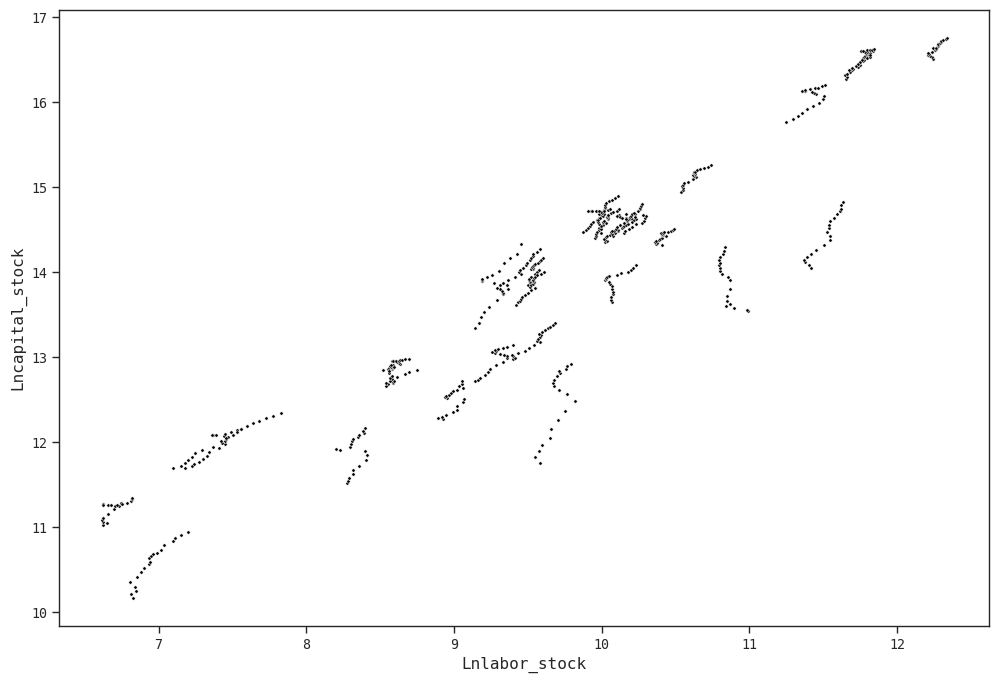

In [26]:
sns.scatterplot(df , x='Lnlabor_stock' , y='Lncapital_stock' , marker='.' , color='black')

---
## Graphical checks for linearity, normality, and homoskedasticity
### **Exog-endog scatter plots**

#### Scatterplots of all countries and all years

In [27]:
df_diff.head()

,Index,country,year,Lnrgdpo,Lnlabor_stock,Lncapital_stock,RL,GS,RE,MO,...,LnGS,LnRE,LnMO,d_Lnrgdpo,d_Lnlabor_stock,d_Lncapital_stock,d_RL,d_GS,d_RE,d_MO
1,1,Austria,2001,12.611415,9.960741,14.427767,83.0,34.60,79.800000,72.666667,...,3.543854,4.379524,4.285883,-0.022952,0.004790,0.025192,0.5,0.00,0.600000,-1.666667
2,2,Austria,2002,12.632283,9.963124,14.448936,83.5,31.70,78.200000,73.200000,...,3.456317,4.359270,4.293195,0.020868,0.002383,0.021170,0.5,-2.90,-1.600000,0.533333
3,3,Austria,2003,12.656856,9.970033,14.471249,84.0,31.95,77.550000,73.800000,...,3.464172,4.350923,4.301359,0.024573,0.006909,0.022313,0.5,0.25,-0.650000,0.600000
4,4,Austria,2004,12.696109,9.981648,14.492561,84.0,32.25,77.950000,73.266667,...,3.473518,4.356068,4.294106,0.039253,0.011614,0.021312,0.0,0.30,0.400000,-0.533333
5,5,Austria,2005,12.786535,9.982874,14.512759,85.0,33.50,76.866667,73.400000,...,3.511545,4.342072,4.295924,0.090427,0.001227,0.020198,1.0,1.25,-1.083333,0.133333


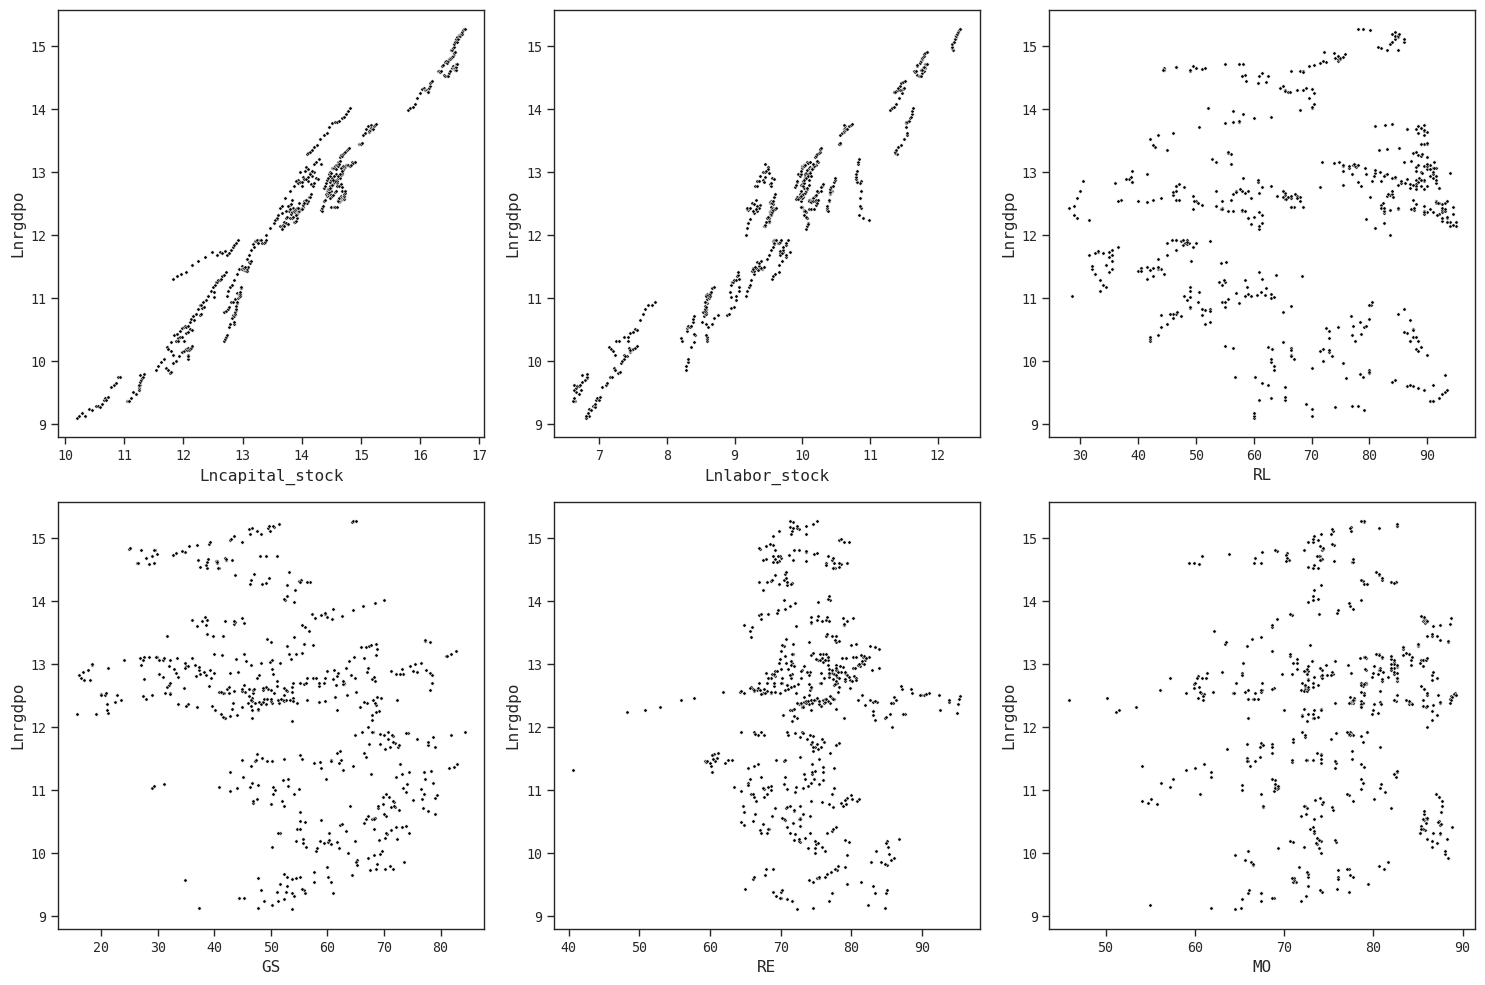

In [28]:
# List of columns to plot against 'Lnrgdpo'
columns = ['Lncapital_stock', 'Lnlabor_stock', 'RL', 'GS', 'RE', 'MO']

# Create a figure and an array of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop over the columns and axes and create the scatterplots
for i, col in enumerate(columns):
    sns.scatterplot(data=df_diff, x=col, y='Lnrgdpo', marker='.', ax=axs[i] , color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Scatterplots of one country for all years (Finland)

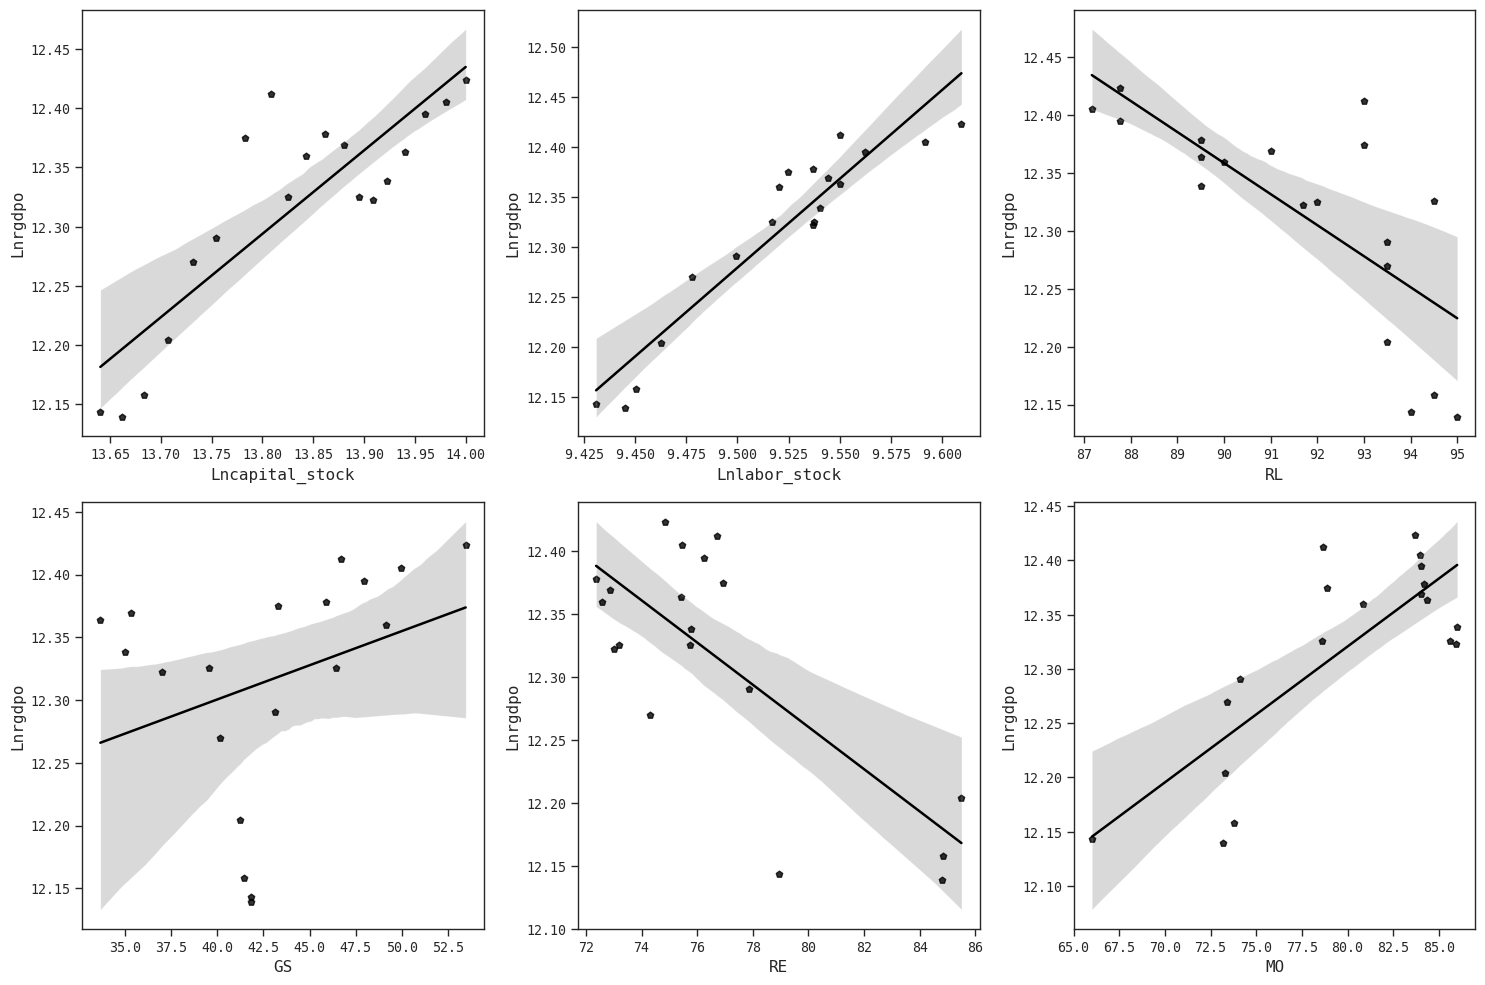

In [29]:
# List of columns to plot against 'Lnrgdpo'
columns = ['Lncapital_stock', 'Lnlabor_stock', 'RL', 'GS', 'RE', 'MO']

# Create a figure and an array of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop over the columns and axes and create the scatterplots
for i, col in enumerate(columns):
    sns.regplot(data=df_diff[df_diff['country'] == 'Finland'], x=col, y='Lnrgdpo', marker='p', ax=axs[i] , color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Scatterplots of all countries for one year (2018)

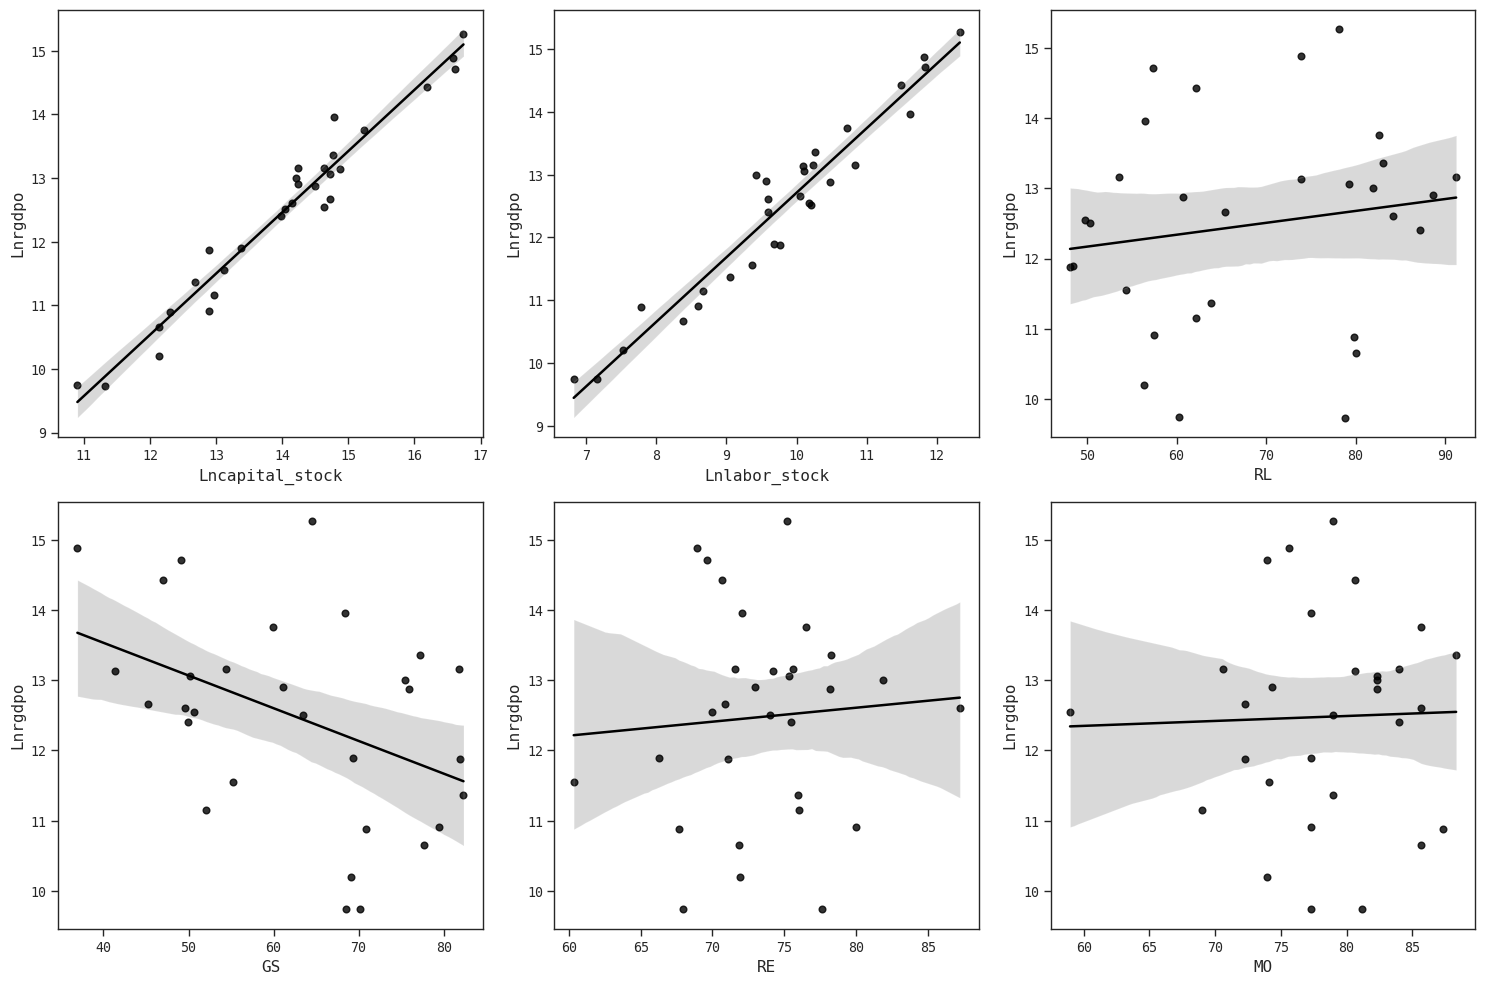

In [30]:
# List of columns to plot against 'Lnrgdpo'
columns = ['Lncapital_stock', 'Lnlabor_stock', 'RL', 'GS', 'RE', 'MO']

# Create a figure and an array of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop over the columns and axes and create the scatterplots
for i, col in enumerate(columns):
    sns.regplot(data=df_diff[df_diff['year'] == 2018], x=col, y='Lnrgdpo', marker='o', ax=axs[i] , color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### **Resid and QQ plots**

In [31]:
R_models['Model'].unique()

array(['Pooled', 'RE', 'FE', 'CCE_P', 'CCE_MG', 'FE_diff', 'CCE_P_diff',
       'CCE_MG_diff', 'CCE_MG_diff2'], dtype=object)

---
#### Pooled model

Text(0, 0.5, 'Residuals')

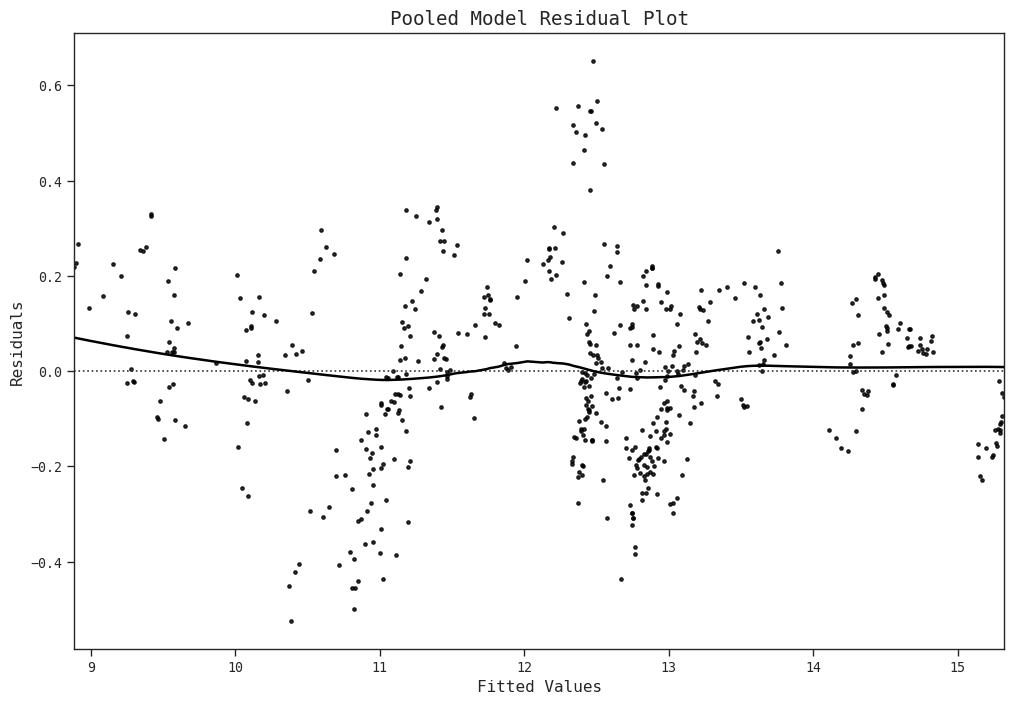

In [32]:
fitted_values = R_models[R_models['Model'] == 'Pooled']['FittedValues']
residuals = R_models[R_models['Model'] == 'Pooled']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('Pooled Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [33]:
residuals

0     -0.220288
1     -0.214846
2     -0.211899
3     -0.188784
4     -0.125567
         ...   
565    0.059464
566    0.054649
567    0.134064
568    0.128993
569    0.105221
Name: Residuals, Length: 570, dtype: float64

Text(0.5, 1.0, 'Pooled Model QQ Plot')

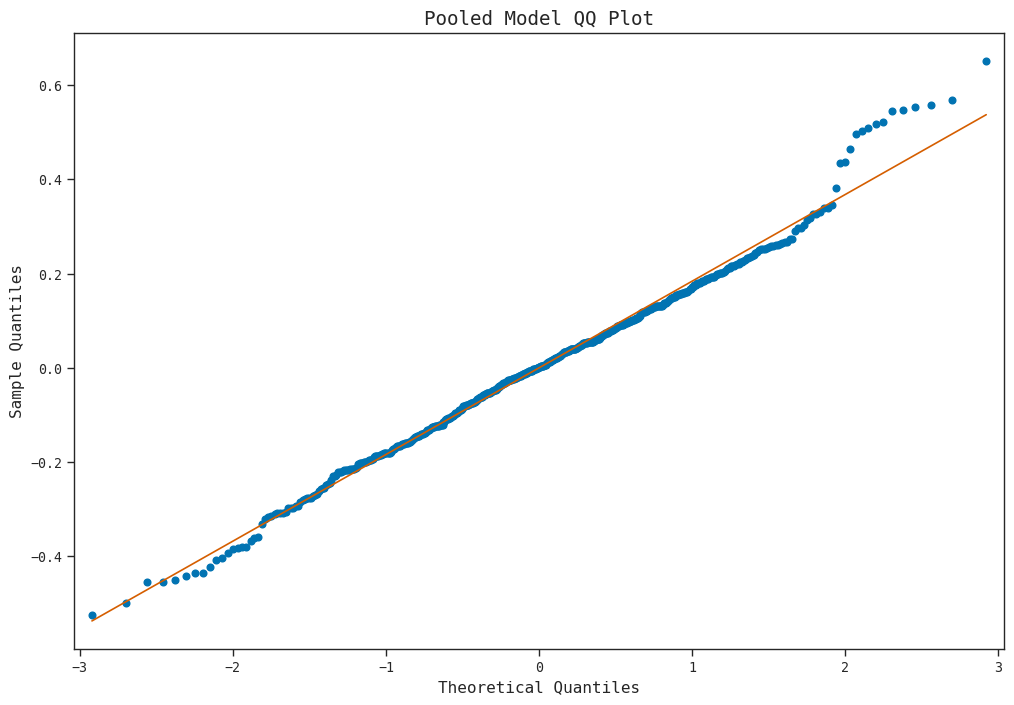

In [34]:
# QQPlot
fig = sm.qqplot(residuals, line='s')
plt.title('Pooled Model QQ Plot')

Text(0.5, 1.0, 'Pooled Model Residual Distribution')

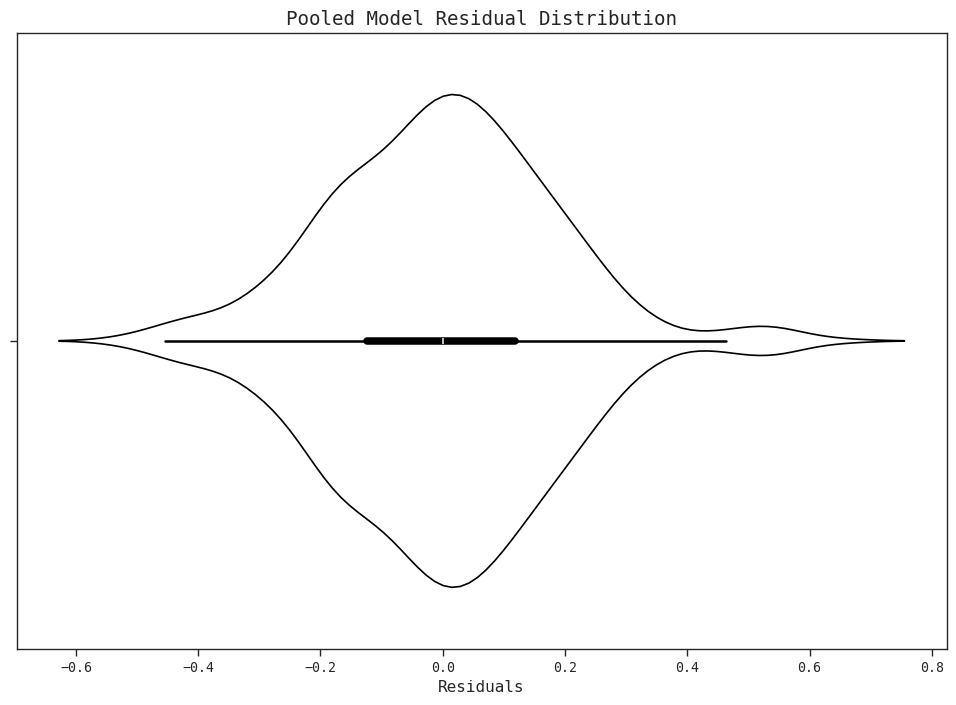

In [35]:
# Boxplot of the residuals
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('Pooled Model Residual Distribution')

---
#### FE model

Text(0, 0.5, 'Residuals')

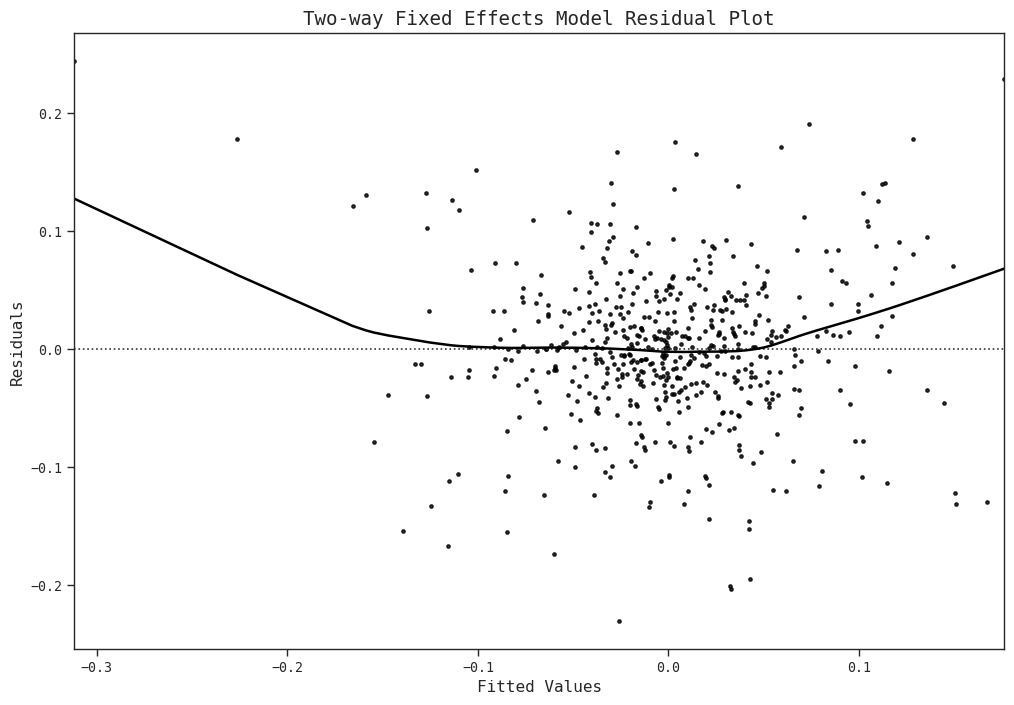

In [36]:
# FE model
fitted_values = R_models[R_models['Model'] == 'FE']['FittedValues']
residuals = R_models[R_models['Model'] == 'FE']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('Two-way Fixed Effects Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Two-way Fixed Effects Model QQ Plot')

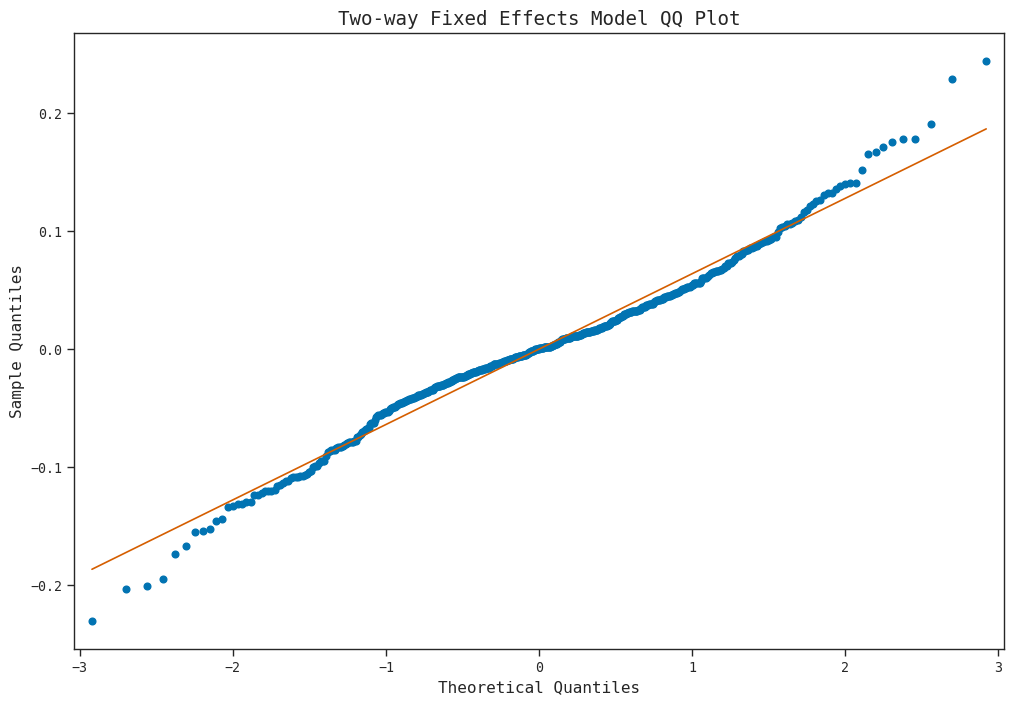

In [37]:
# QQPlot
sm.qqplot(residuals, line='s')
plt.title('Two-way Fixed Effects Model QQ Plot')

Text(0.5, 1.0, 'Two-way Fixed Effects Model Residual Distribution')

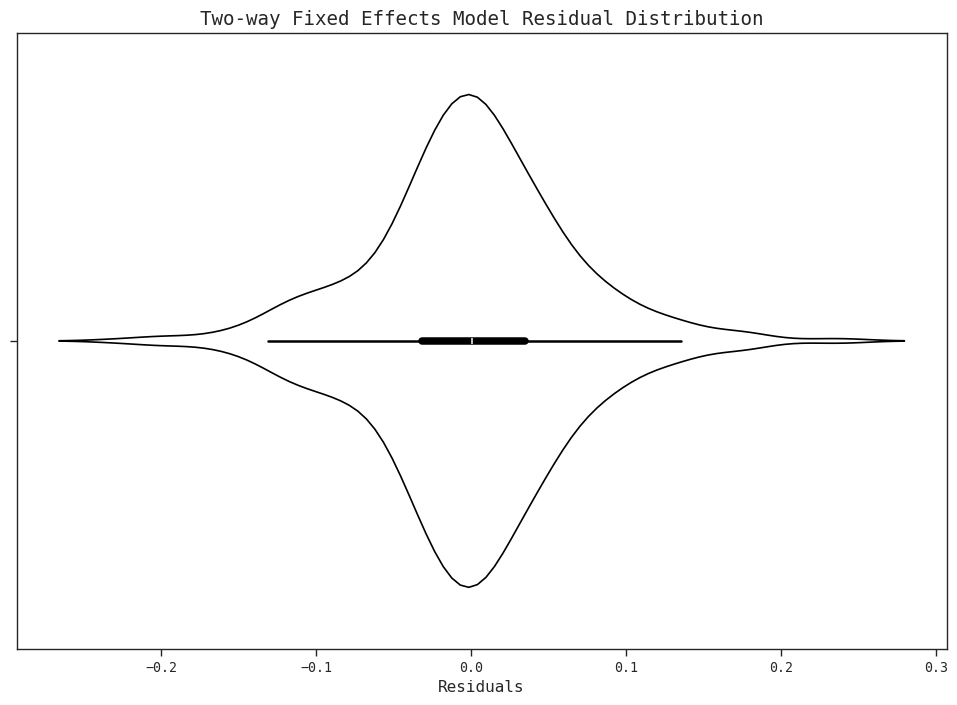

In [38]:
# Boxplot of the residuals
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('Two-way Fixed Effects Model Residual Distribution')

---
#### CCEP model

Text(0, 0.5, 'Residuals')

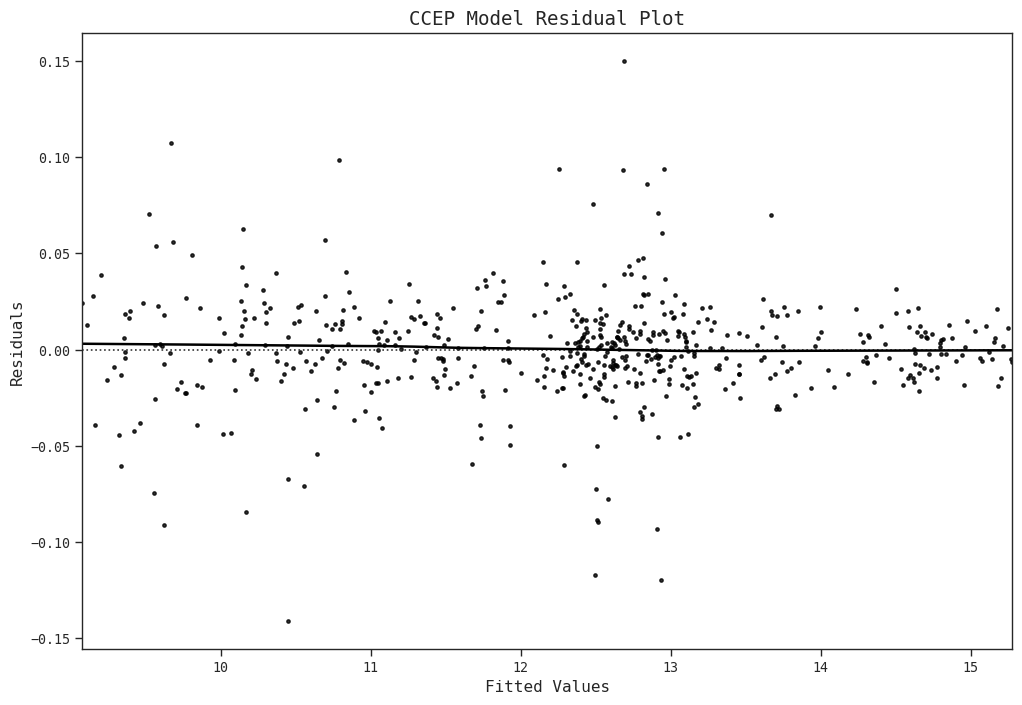

In [39]:
fitted_values = R_models[R_models['Model'] == 'CCE_P']['FittedValues']
residuals = R_models[R_models['Model'] == 'CCE_P']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('CCEP Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'CCEP Model QQ Plot')

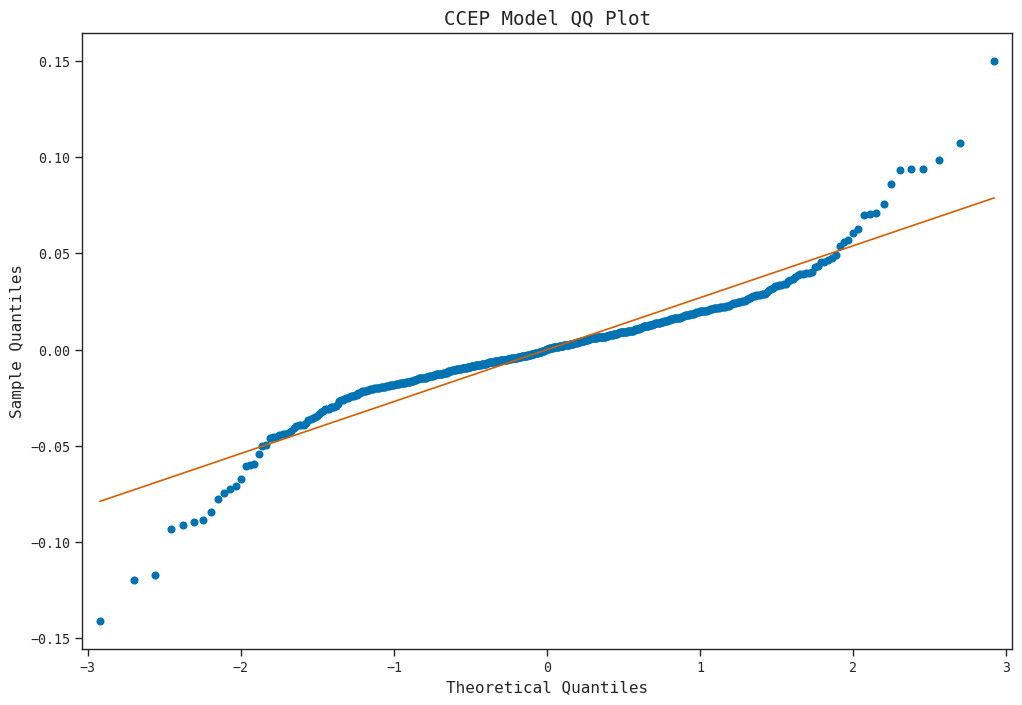

In [40]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('CCEP Model QQ Plot')

Text(0.5, 1.0, 'CCEP Model Residual Distribution')

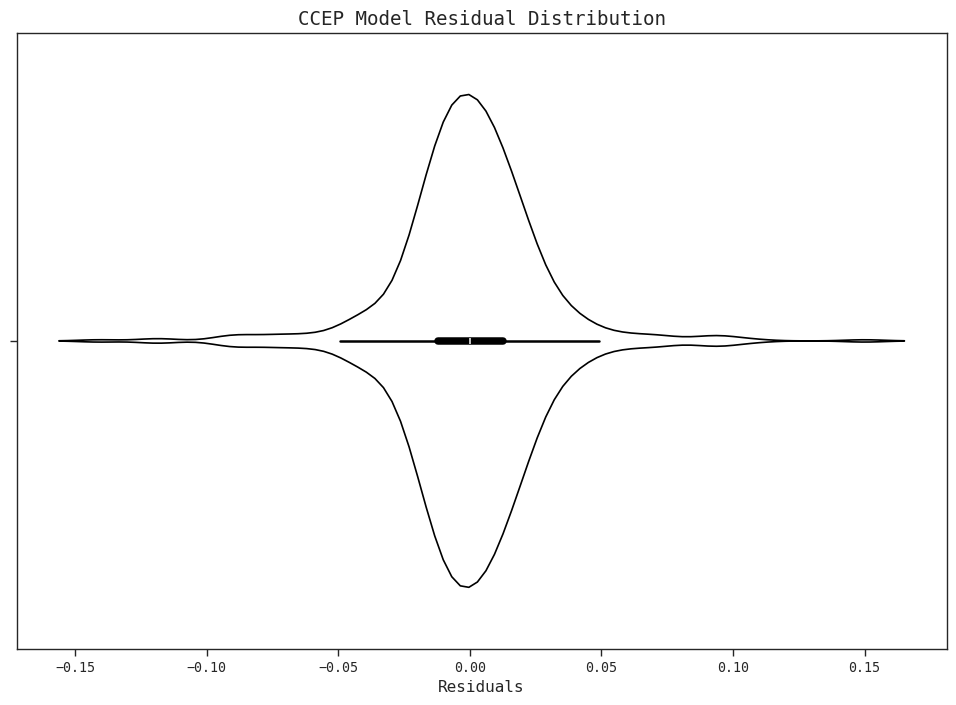

In [41]:
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('CCEP Model Residual Distribution')

---
#### CCEMG model

Text(0, 0.5, 'Residuals')

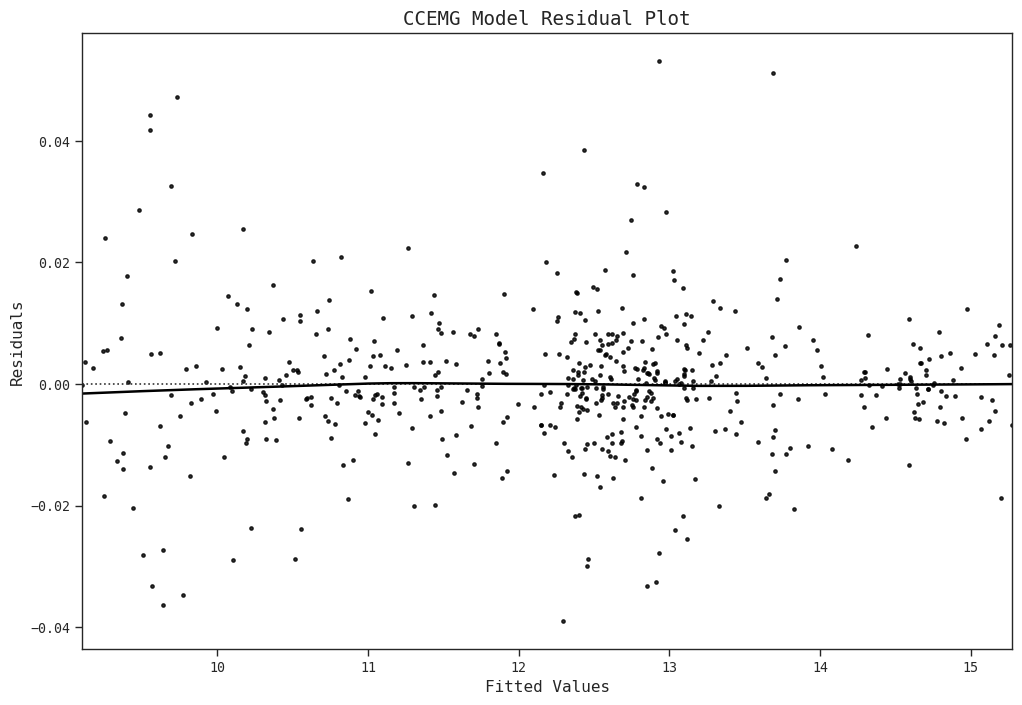

In [42]:
fitted_values = R_models[R_models['Model'] == 'CCE_MG']['FittedValues']
residuals = R_models[R_models['Model'] == 'CCE_MG']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('CCEMG Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'CCEMG Model QQ Plot')

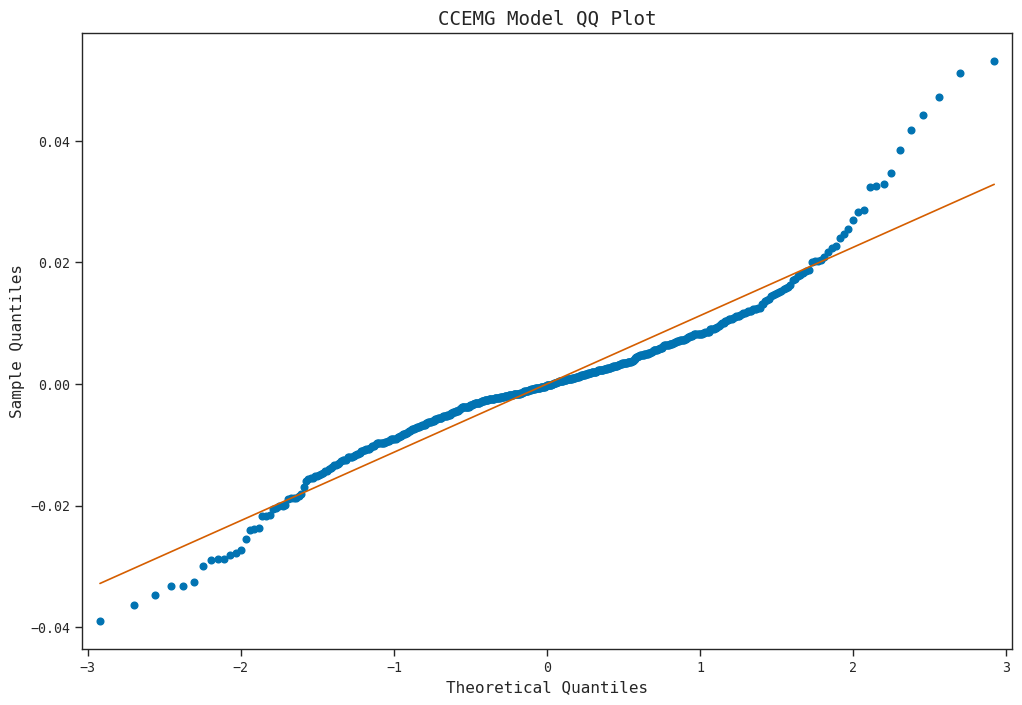

In [43]:
sm.qqplot(residuals , line='s')
plt.title('CCEMG Model QQ Plot')

Text(0.5, 1.0, 'CCEMG Model Residual Distribution')

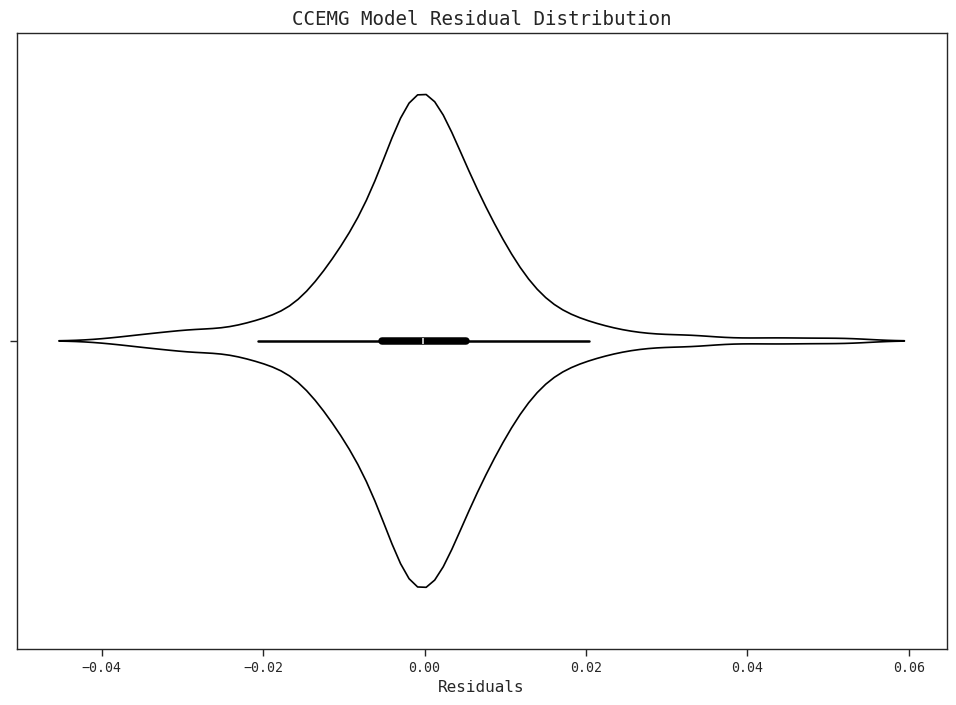

In [44]:
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('CCEMG Model Residual Distribution')

---
#### FE_diff model

Text(0, 0.5, 'Residuals')

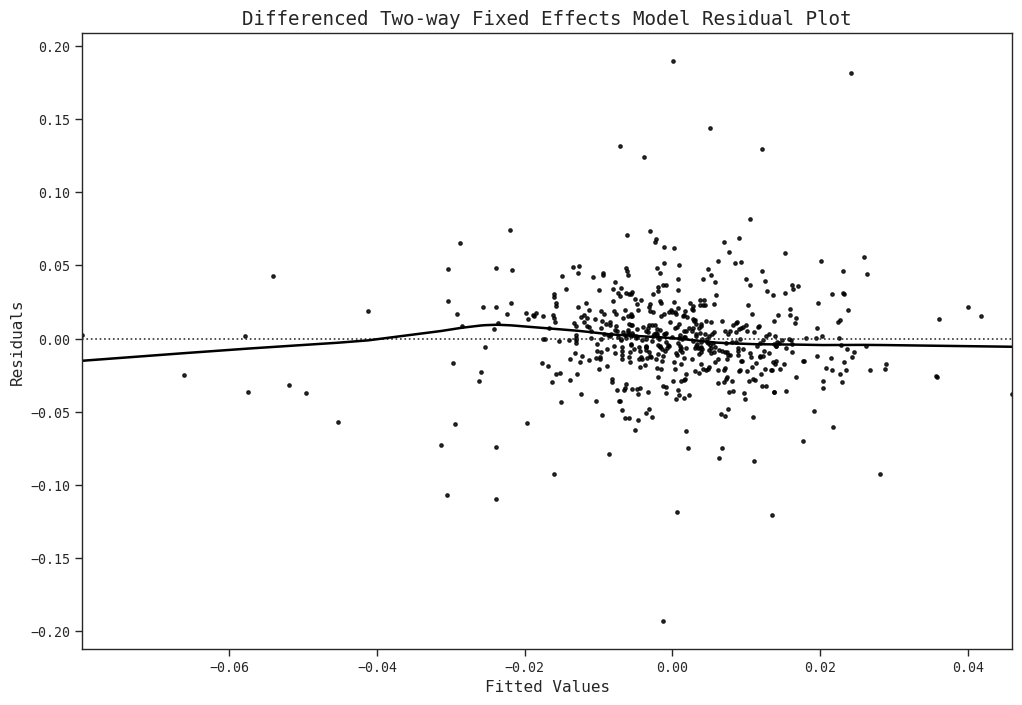

In [45]:
fitted_values = R_models[R_models['Model'] == 'FE_diff']['FittedValues']
residuals = R_models[R_models['Model'] == 'FE_diff']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('Differenced Two-way Fixed Effects Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Differenced Two-way Fixed Effects Model QQ Plot')

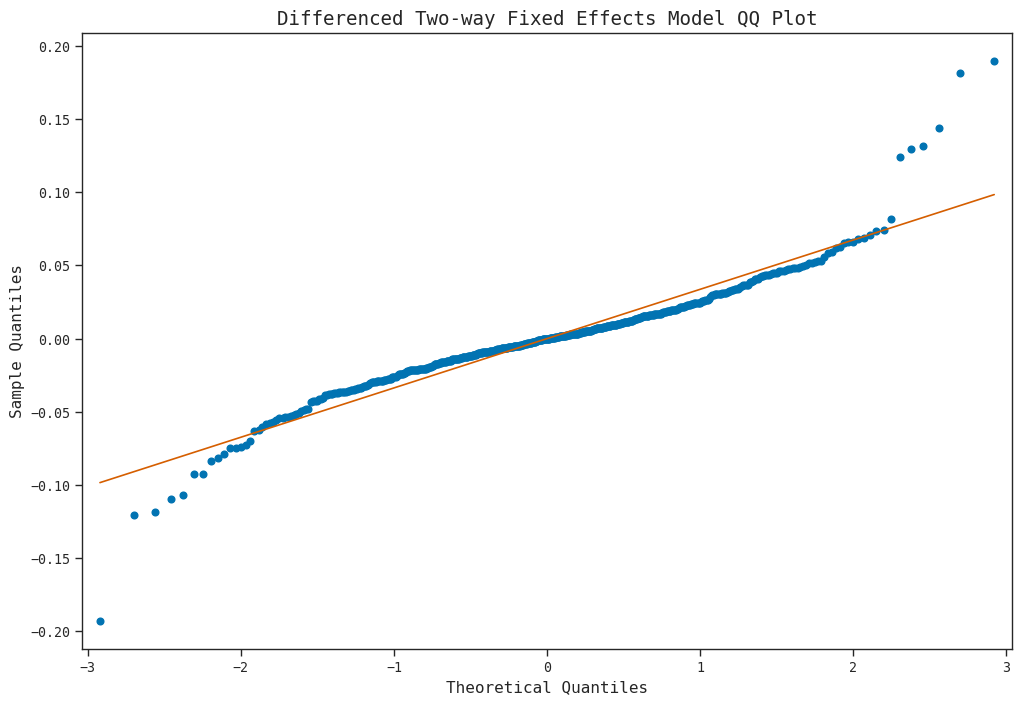

In [46]:
sm.qqplot(residuals , line='s')
plt.title('Differenced Two-way Fixed Effects Model QQ Plot')

Text(0.5, 1.0, 'Differenced Two-way Fixed Effects Model Residual Distribution')

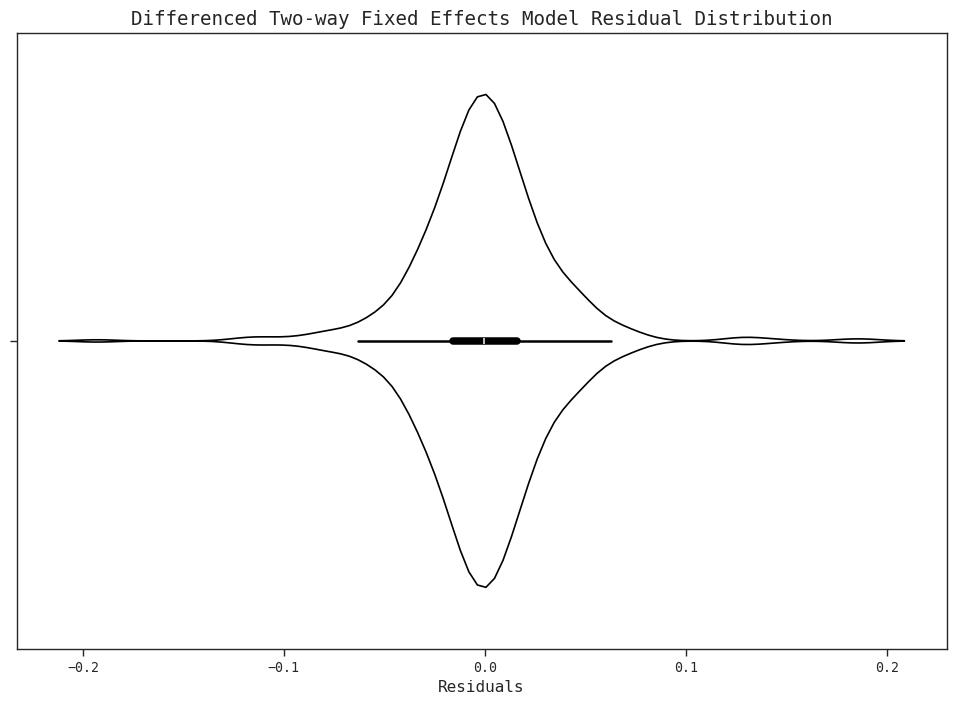

In [47]:
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('Differenced Two-way Fixed Effects Model Residual Distribution')

---
#### CCE_P_diff model

Text(0, 0.5, 'Residuals')

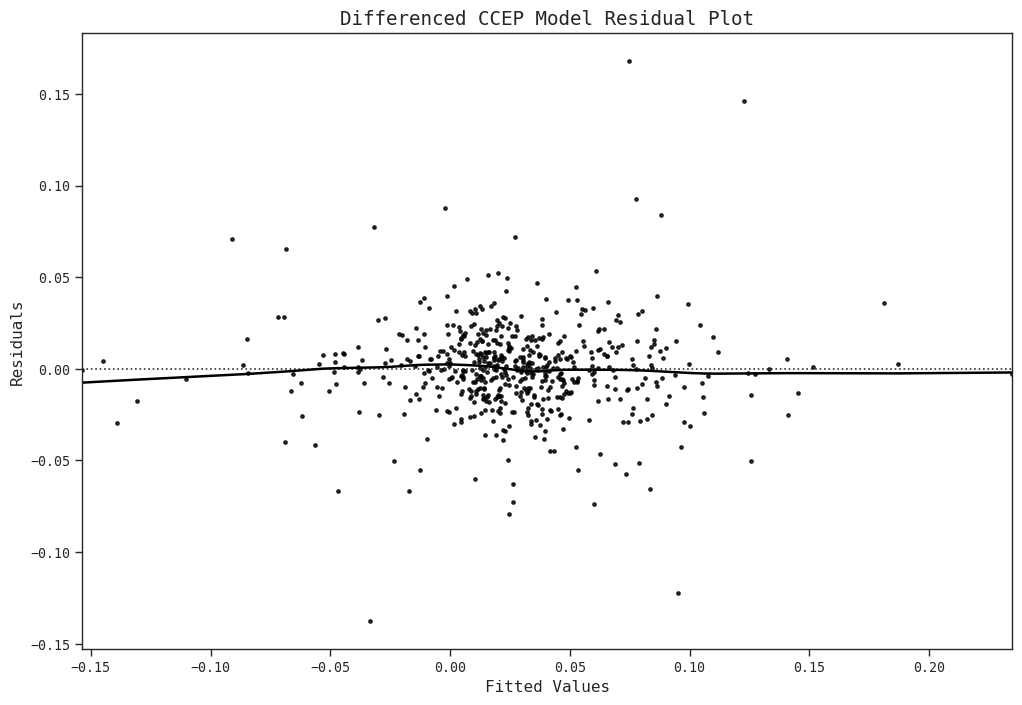

In [48]:
fitted_values = R_models[R_models['Model'] == 'CCE_P_diff']['FittedValues']
residuals = R_models[R_models['Model'] == 'CCE_P_diff']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('Differenced CCEP Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Differenced CCEP QQ Plot')

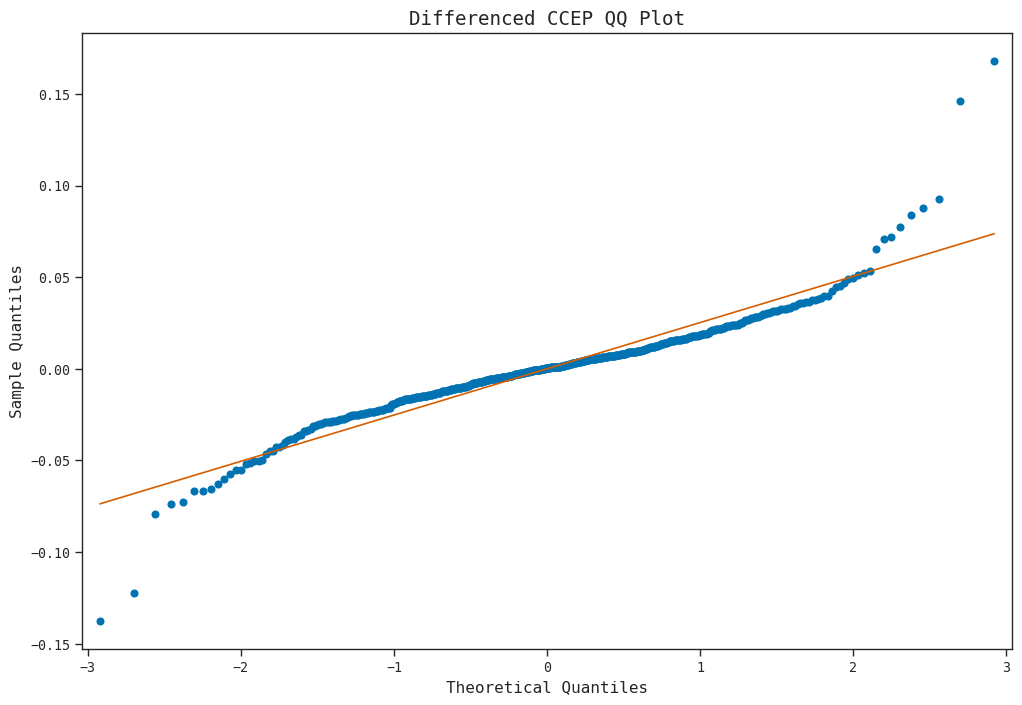

In [49]:
sm.qqplot(residuals , line='s')
plt.title('Differenced CCEP QQ Plot')

Text(0.5, 1.0, 'Differenced CCEP Model Residual Distribution')

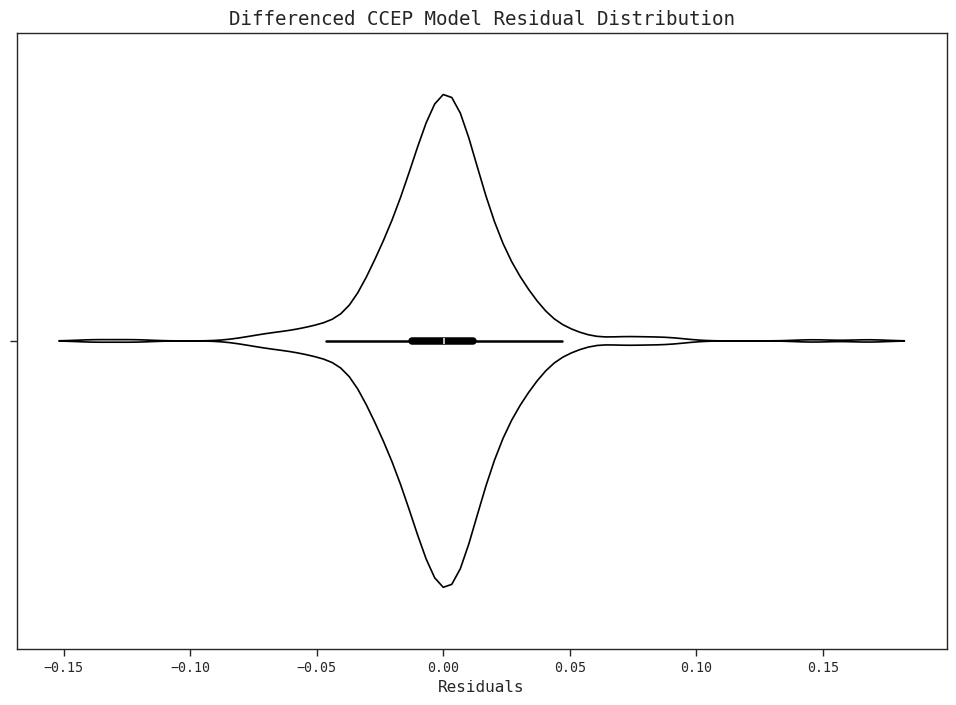

In [50]:
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('Differenced CCEP Model Residual Distribution')

---
#### CCE_MG_diff model

Text(0, 0.5, 'Residuals')

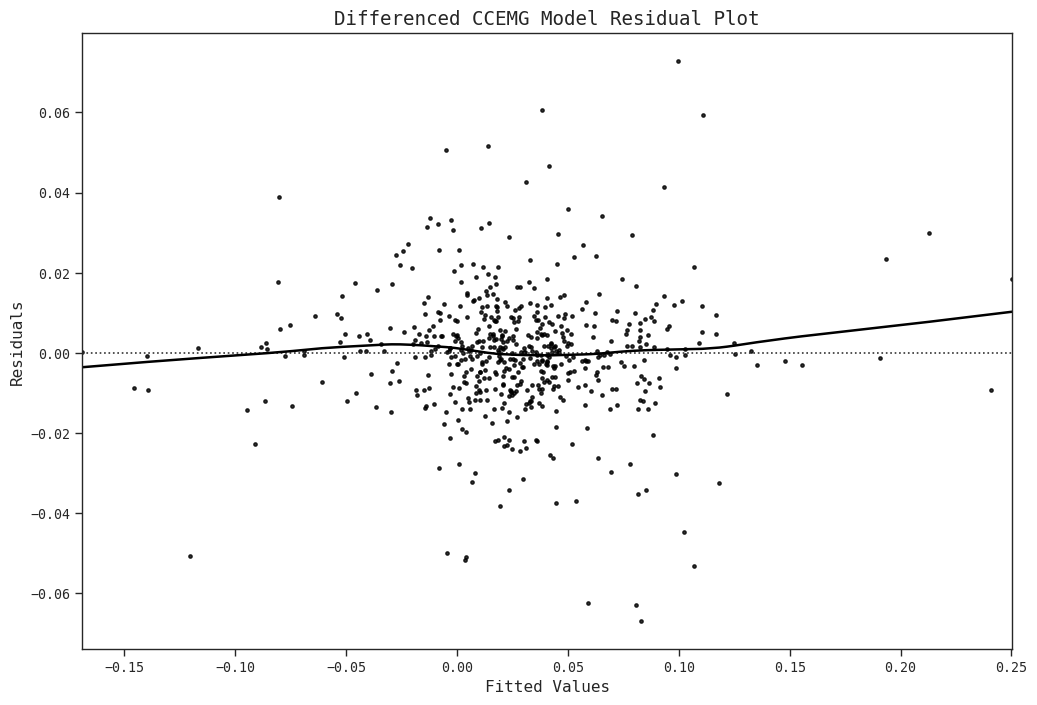

In [51]:
fitted_values = R_models[R_models['Model'] == 'CCE_MG_diff']['FittedValues']
residuals = R_models[R_models['Model'] == 'CCE_MG_diff']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('Differenced CCEMG Model Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Differenced CCEMG Model QQ Plot')

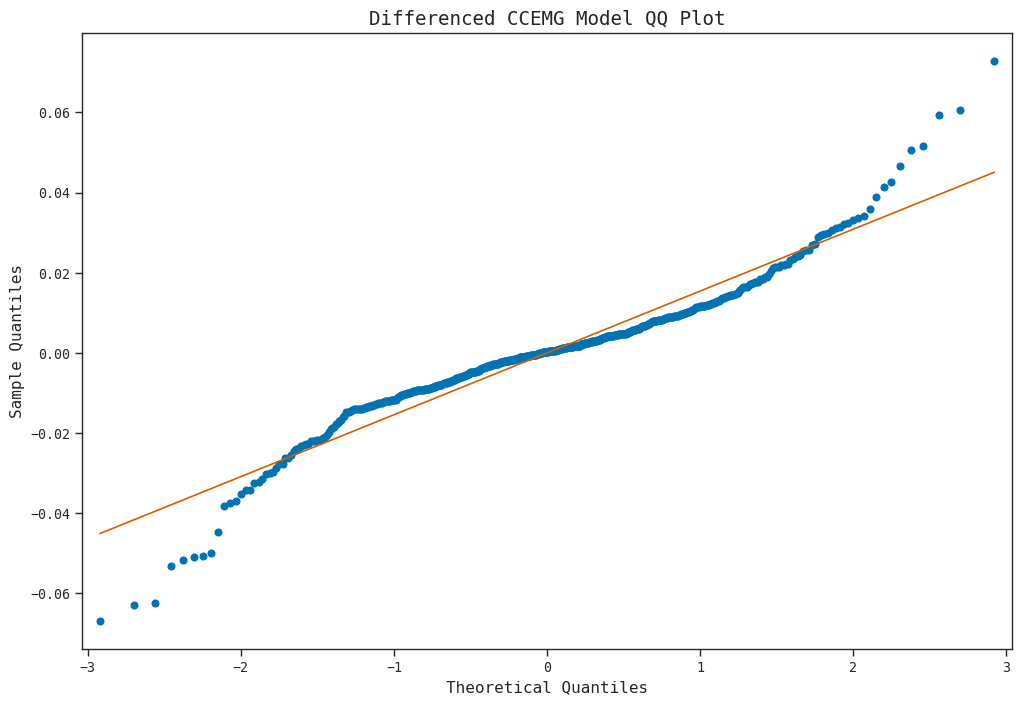

In [52]:
sm.qqplot(residuals , line='s')
plt.title('Differenced CCEMG Model QQ Plot')

Text(0.5, 1.0, 'Differenced CCEMG Model Residual Distribution')

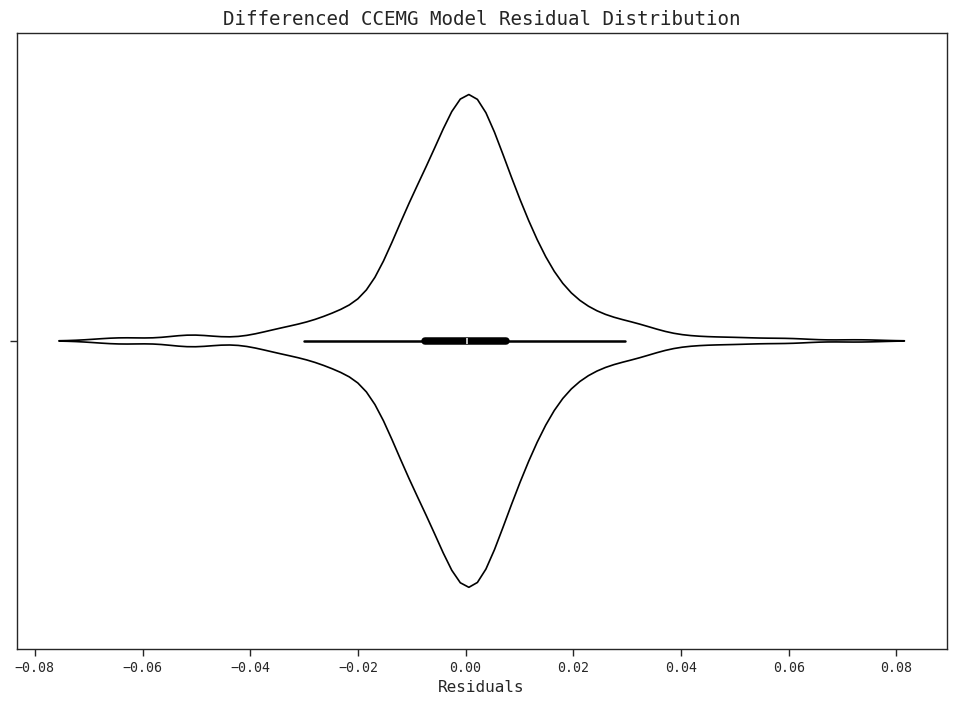

In [53]:
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('Differenced CCEMG Model Residual Distribution')

---
#### CCE_MG_diff model excluding Lncapital_stock

Text(0, 0.5, 'Residuals')

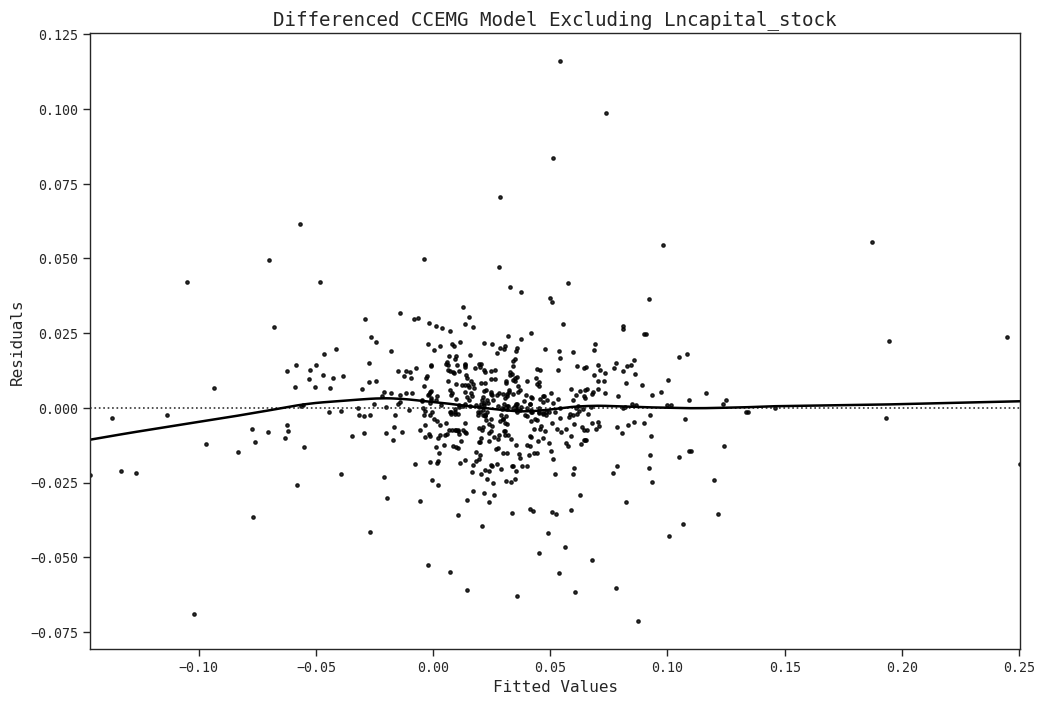

In [54]:
fitted_values = R_models[R_models['Model'] == 'CCE_MG_diff2']['FittedValues']
residuals = R_models[R_models['Model'] == 'CCE_MG_diff2']['Residuals']
sns.residplot(x=fitted_values , y=residuals , lowess=True , scatter_kws=dict(marker='.') , color='black')
plt.title('Differenced CCEMG Model Excluding Lncapital_stock')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Differenced CCEMG Model Excluding Lncapital_stock QQ Plot')

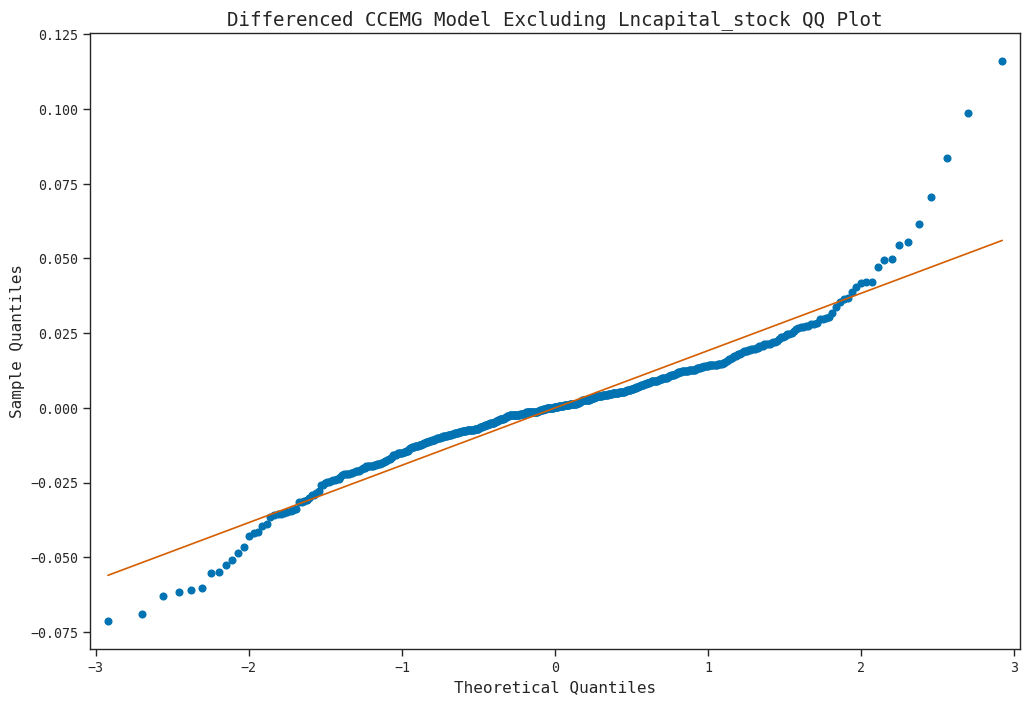

In [55]:
sm.qqplot(residuals , line='s')
plt.title('Differenced CCEMG Model Excluding Lncapital_stock QQ Plot')

Text(0.5, 1.0, 'Differenced CCEMG Model Excluding Lncapital_stock Residual Distribution')

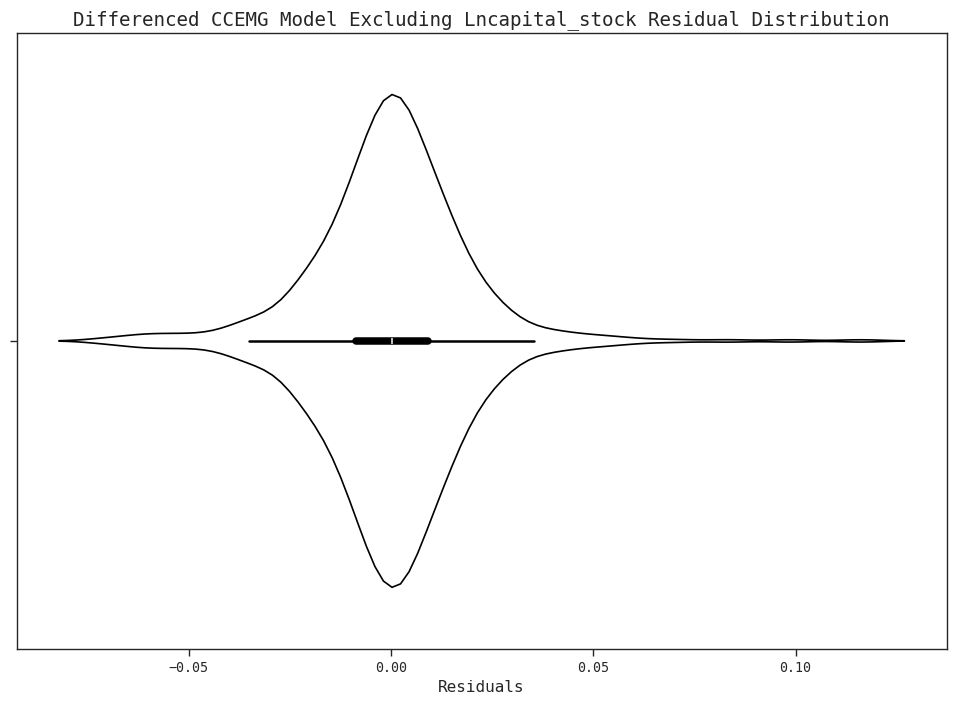

In [56]:
sns.violinplot(residuals, orient='h' , color='black' , fill=False)
plt.title('Differenced CCEMG Model Excluding Lncapital_stock Residual Distribution')

## Formal tests for heteroskedasticity, autocorrelation, and cross-sectional dependence

### Breusch-Pagan test for homoskedasticity

$ H_{0} : \sigma_{i}^2 = \sigma^2 \quad \forall i $

$ H_{1} : \sigma_{i}^2 = \sigma^2 h(i) \quad $
where $h(i)$ is a function of the predictors, indicating that the variance changes with the predictors.

### Breusch-Godfrey/Wooldridge test for serial correlation

$ H_{0} : Cov(\epsilon_{it} , \epsilon_{is}) = 0 \quad \forall t \ne s \quad$
where  $\epsilon_{it}$  and  $\epsilon_{is}$  are the idiosyncratic errors at different time points  $t$  and  $s$  for the same individual  $i$ .

$ H_{1} : Cov(\epsilon_{it} , \epsilon_{is}) \ne 0 \quad \text{for some} \ t \ne s$

### Pesaran's CD test for cross-sectional dependence

$ H_{0} : Cov(\epsilon_{it} , \epsilon_{jt}) = 0 \quad \forall i \ne j \quad$
where $\epsilon_{it}$ and $\epsilon_{jt}$ are the idiosyncratic errors for different cross-sectional units $i$ and $j$ at the same time period $t$.

$ H_{1} : Cov(\epsilon_{it} , \epsilon_{jt}) \ne 0 \quad \text{for some} \ i \ne j$

### Robust Hausman test for RE/FE

$ H_{0} : \beta_{RE} = \beta_{FE} $

$ H_{1} : \beta_{RE} \ne \beta_{FE} $

### Testing for entity and time effects of the FE model

$ H_{0} : \mu_i = \mu \quad \forall i $

$ H_{1} : \mu_i \ne \mu \quad \text{for some} \ i $

$ H_{0} : \lambda_t = \lambda \quad \forall t $

$ H_{1} : \lambda_t \ne \lambda \quad \text{for some} \ t $

### Cross-sectionally augmented Im, Pesaran, and Shin (IPS) test for unit roots in panel models

$ H_{0} : \rho_i = 1 \quad \forall i $

$ H_{1} : \rho_i < 1 \quad \text{for some} \ i $

#### Regular models

#### Differenced models